In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#reading file
data = pd.read_csv('result_dataset_directors_huge_runtime.csv')
data.head()

title_id                  title_name  rating  year  numVotes     genre1  \
0  tt0002130             Dante's Inferno     7.0  1911      2706  Adventure   
1  tt0002130             Dante's Inferno     7.0  1911      2706  Adventure   
2  tt0003740                     Cabiria     7.1  1914      3434  Adventure   
3  tt0004707  Tillie's Punctured Romance     6.3  1914      3466     Comedy   
4  tt0004707  Tillie's Punctured Romance     6.3  1914      3466     Comedy   

  genre2   genre3                    actor1           actor2  \
0  Drama  Fantasy            Salvatore Papa  Arturo Pirovano   
1  Drama  Fantasy            Salvatore Papa  Arturo Pirovano   
2  Drama  History  Italia Almirante-Manzini   Lidia Quaranta   
3      0        0           Charles Chaplin   Marie Dressler   
4      0        0           Charles Chaplin   Marie Dressler   

                actor3            actor4        director_name  runtime  
0  Giuseppe de Liguoro  Pier Delle Vigne  Francesco Bertolini       71  
1  Giuseppe de Liguoro  Pier Delle Vigne       Adolfo Padovan       71  
2    Bartolomeo Pagano   Carolina Catena    Giovanni Pastrone      148  
3        Mabel Normand        Mack Swain         Mack Sennett       82  
4        Mabel Normand        Mack Swain      Charles Bennett       82

In [3]:
#printing shape of the dataset
print('data',data.shape)

data (21508, 14)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21508 entries, 0 to 21507
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       21508 non-null  object 
 1   title_name     21508 non-null  object 
 2   rating         21508 non-null  float64
 3   year           21508 non-null  int64  
 4   numVotes       21508 non-null  int64  
 5   genre1         21508 non-null  object 
 6   genre2         21508 non-null  object 
 7   genre3         21508 non-null  object 
 8   actor1         21508 non-null  object 
 9   actor2         21508 non-null  object 
 10  actor3         21508 non-null  object 
 11  actor4         21508 non-null  object 
 12  director_name  21508 non-null  object 
 13  runtime        21508 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.3+ MB


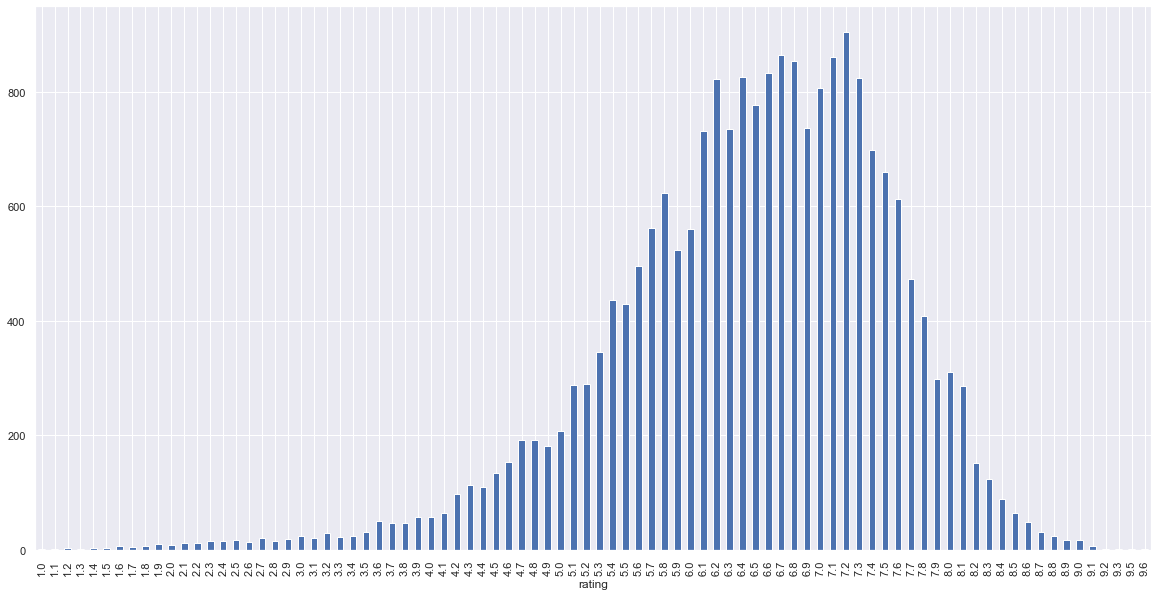

In [5]:
# Plot a graph of ratings for all the movies for all years under consideration
data.groupby('rating')['title_id'].count().plot(kind='bar',figsize=(20, 10));

In [6]:
# Add a column for rounded value of average rating for each movie
data['rating_rounded']=data['rating'].round() 
data.head()

title_id                  title_name  rating  year  numVotes     genre1  \
0  tt0002130             Dante's Inferno     7.0  1911      2706  Adventure   
1  tt0002130             Dante's Inferno     7.0  1911      2706  Adventure   
2  tt0003740                     Cabiria     7.1  1914      3434  Adventure   
3  tt0004707  Tillie's Punctured Romance     6.3  1914      3466     Comedy   
4  tt0004707  Tillie's Punctured Romance     6.3  1914      3466     Comedy   

  genre2   genre3                    actor1           actor2  \
0  Drama  Fantasy            Salvatore Papa  Arturo Pirovano   
1  Drama  Fantasy            Salvatore Papa  Arturo Pirovano   
2  Drama  History  Italia Almirante-Manzini   Lidia Quaranta   
3      0        0           Charles Chaplin   Marie Dressler   
4      0        0           Charles Chaplin   Marie Dressler   

                actor3            actor4        director_name  runtime  \
0  Giuseppe de Liguoro  Pier Delle Vigne  Francesco Bertolini       71   
1  Giuseppe de Liguoro  Pier Delle Vigne       Adolfo Padovan       71   
2    Bartolomeo Pagano   Carolina Catena    Giovanni Pastrone      148   
3        Mabel Normand        Mack Swain         Mack Sennett       82   
4        Mabel Normand        Mack Swain      Charles Bennett       82   

   rating_rounded  
0             7.0  
1             7.0  
2             7.0  
3             6.0  
4             6.0

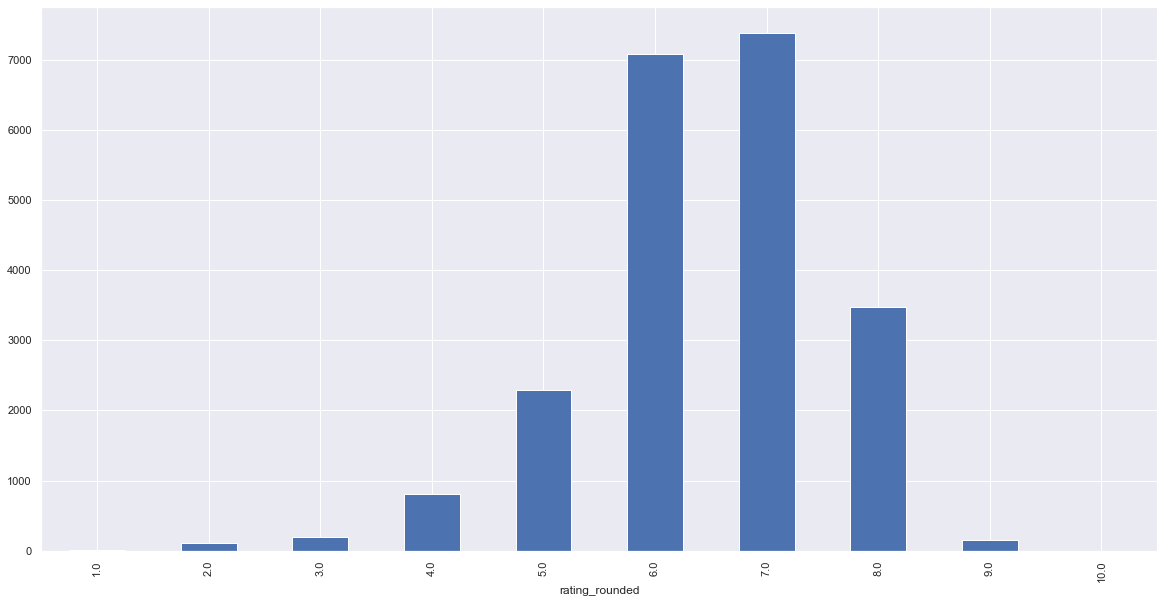

In [7]:
# Plot a graph of ratings for all the movies for all years under consideration
data.groupby('rating_rounded')['title_id'].count().plot(kind='bar',figsize=(20, 10));

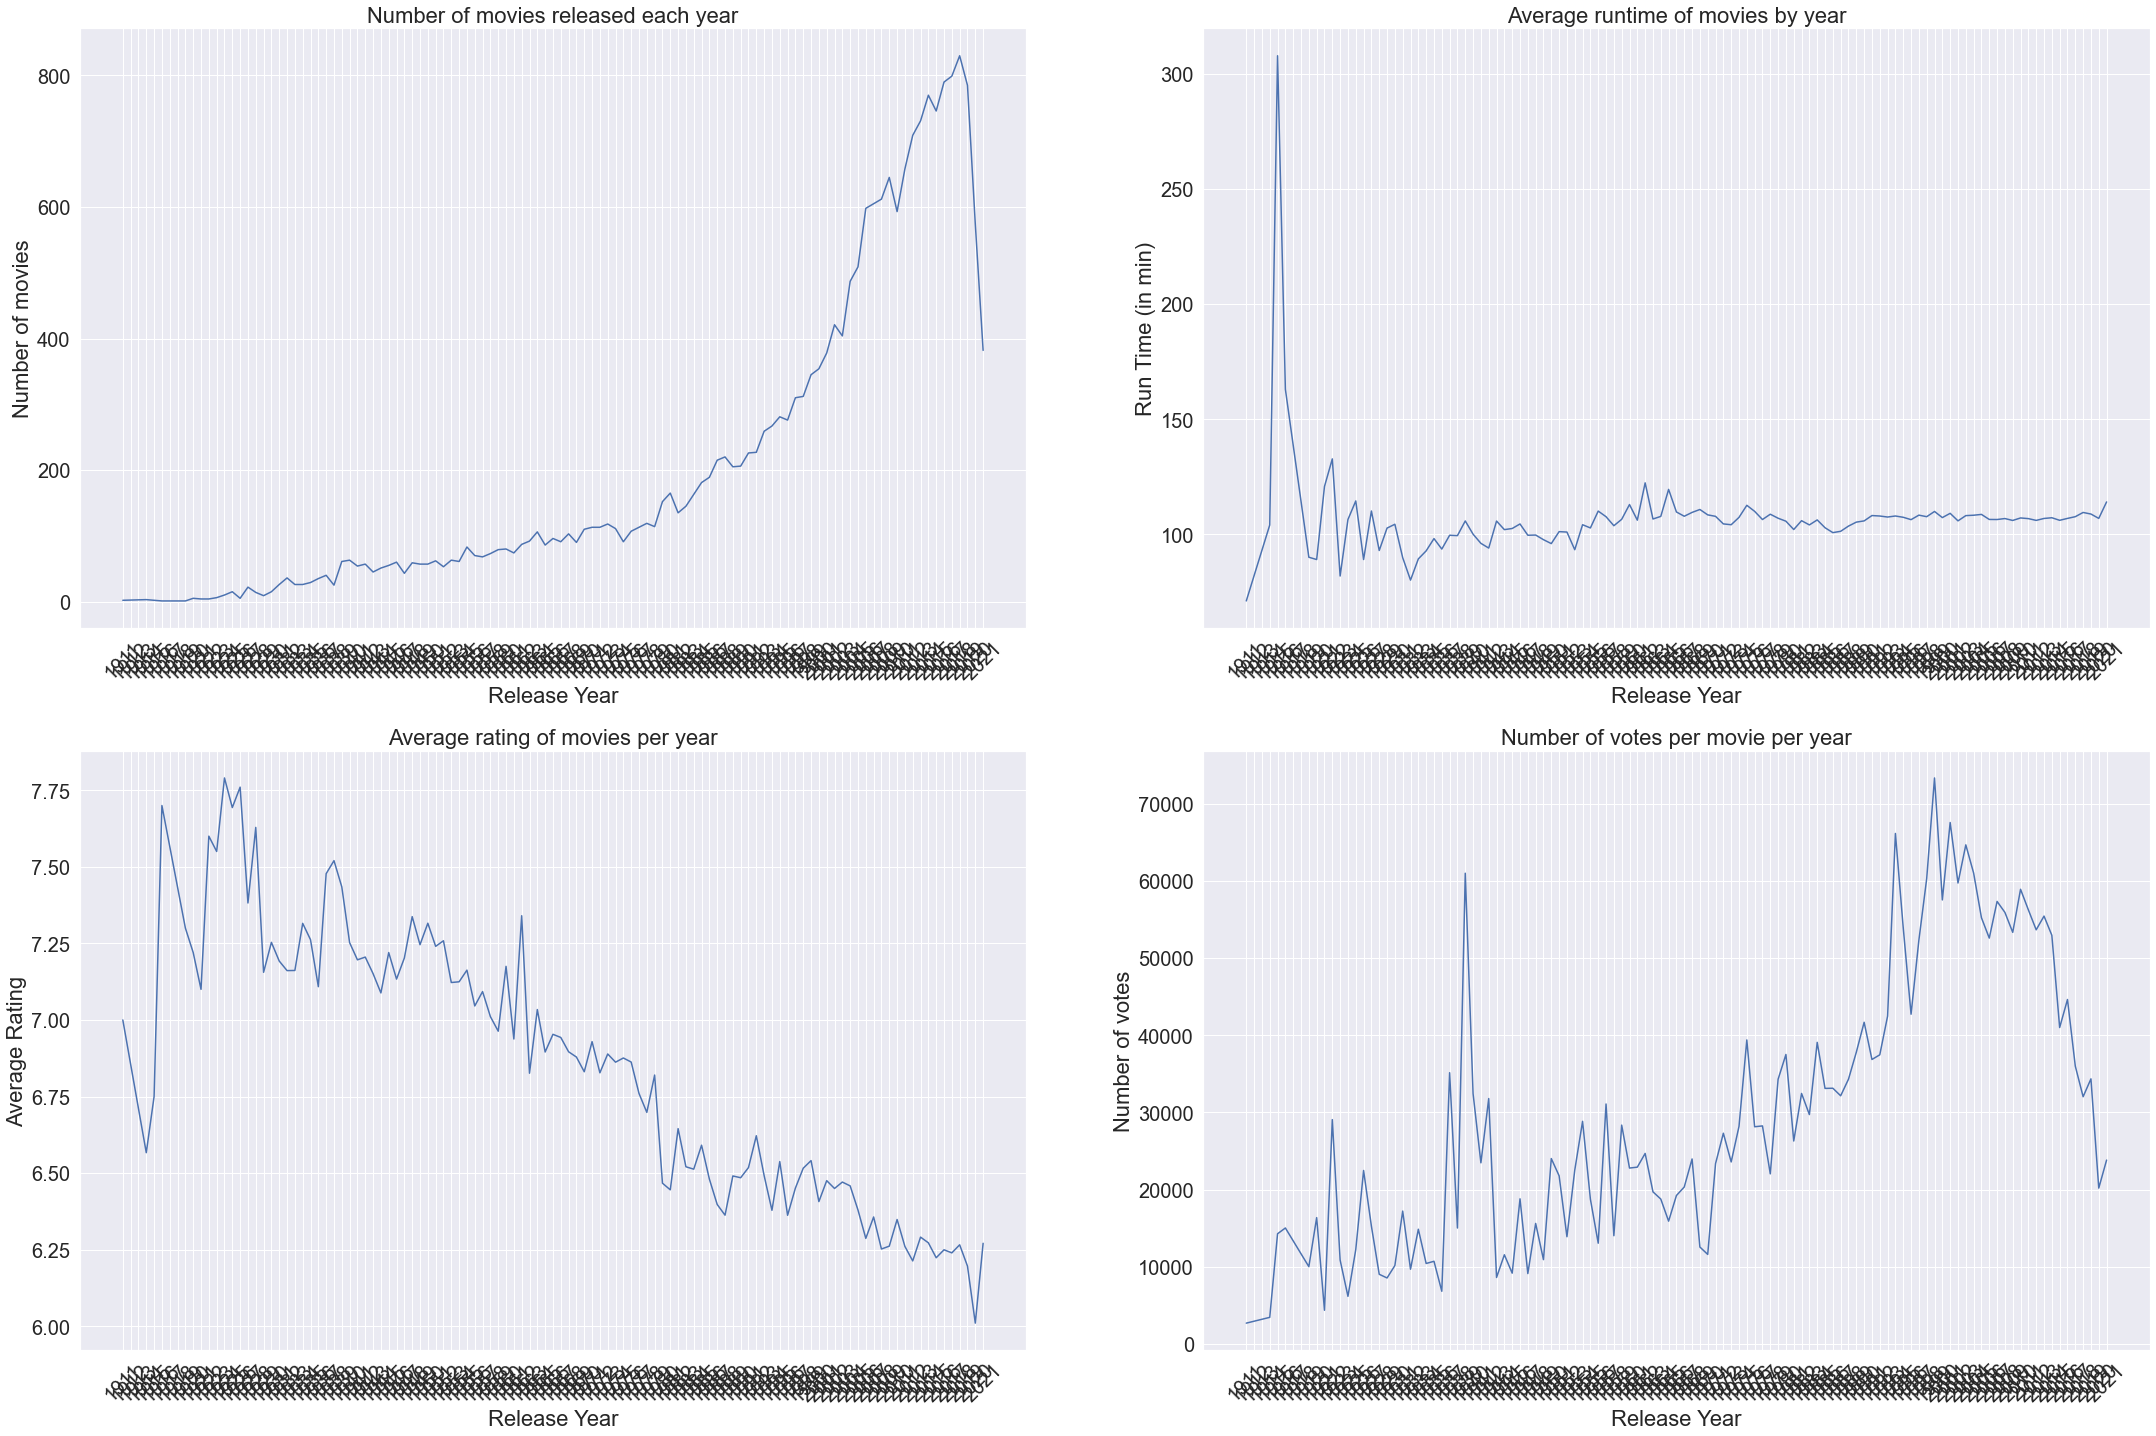

In [8]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)


plt.subplot(2,2,2)
data.groupby('year')['runtime'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(data['year']), max(data['year'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(2,2,1)
data.groupby('year')['title_id'].count().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of movies',fontsize=22)
plt.xticks(np.arange(min(data['year']), max(data['year'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year',fontsize=22)

plt.subplot(2,2,3)
data.groupby('year')['rating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Average Rating',fontsize=22)
plt.xticks(np.arange(min(data['year']), max(data['year'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year',fontsize=22)

plt.subplot(2,2,4)
data.groupby('year')['numVotes'].mean().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of votes',fontsize=22)
plt.title('Number of votes per movie per year',fontsize=22)
plt.xticks(np.arange(min(data['year']), max(data['year'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)


In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum().sum()

0

In [11]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# we are considering movies after 1980 since most of the crew involved in movie making today probably don't have movies to their credit before 1980

In [13]:
# Filter dataset to contain only titles released after 1980: filtered_title
data_filtered=data[((data.year>1980) & (data.year<2019))]

In [14]:
data_filtered.head()

title_id                  title_name  rating  year  numVotes  genre1  \
592   tt0035423              Kate & Leopold     6.4  2001     81880  Comedy   
2629  tt0066498                     The Ear     7.8  1990      2743   Drama   
2826  tt0069049  The Other Side of the Wind     6.8  2018      6916   Drama   
3567  tt0079891              Shaolin Temple     6.9  1982      4217  Action   
3608  tt0080440               The Black Cat     5.9  1981      3692  Horror   

        genre2   genre3            actor1               actor2  \
592    Fantasy  Romance          Meg Ryan         Hugh Jackman   
2629  Thriller        0  Jirina Bohdalová  Radoslav Brzobohatý   
2826         0        0       John Huston            Oja Kodar   
3567     Drama        0            Jet Li               Hai Yu   
3608         0        0     Patrick Magee         Mimsy Farmer   

                 actor3           actor4   director_name  runtime  \
592      Liev Schreiber    Breckin Meyer   James Mangold      118   
2629   Gustav Opocenský   Miroslav Holub   Karel Kachyna       94   
2826  Peter Bogdanovich  Susan Strasberg    Orson Welles      122   
3567        Chenghui Yu         Lan Ding  Hsin-Yen Chang      100   
3608      David Warbeck        Al Cliver     Lucio Fulci       92   

      rating_rounded  
592              6.0  
2629             8.0  
2826             7.0  
3567             7.0  
3608             6.0

In [15]:
data_filtered.shape

(15966, 15)

 Merge the dataset with filtered_title
data_new=pd.merge(data,filtered_title,on='title_id',how='right')

In [16]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15966 entries, 592 to 21408
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title_id        15966 non-null  object 
 1   title_name      15966 non-null  object 
 2   rating          15966 non-null  float64
 3   year            15966 non-null  int64  
 4   numVotes        15966 non-null  int64  
 5   genre1          15966 non-null  object 
 6   genre2          15966 non-null  object 
 7   genre3          15966 non-null  object 
 8   actor1          15966 non-null  object 
 9   actor2          15966 non-null  object 
 10  actor3          15966 non-null  object 
 11  actor4          15966 non-null  object 
 12  director_name   15966 non-null  object 
 13  runtime         15966 non-null  int64  
 14  rating_rounded  15966 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 1.9+ MB


In [17]:
data_filtered.duplicated().sum()

0

In [18]:
data_filtered.isna().sum().sum()

0

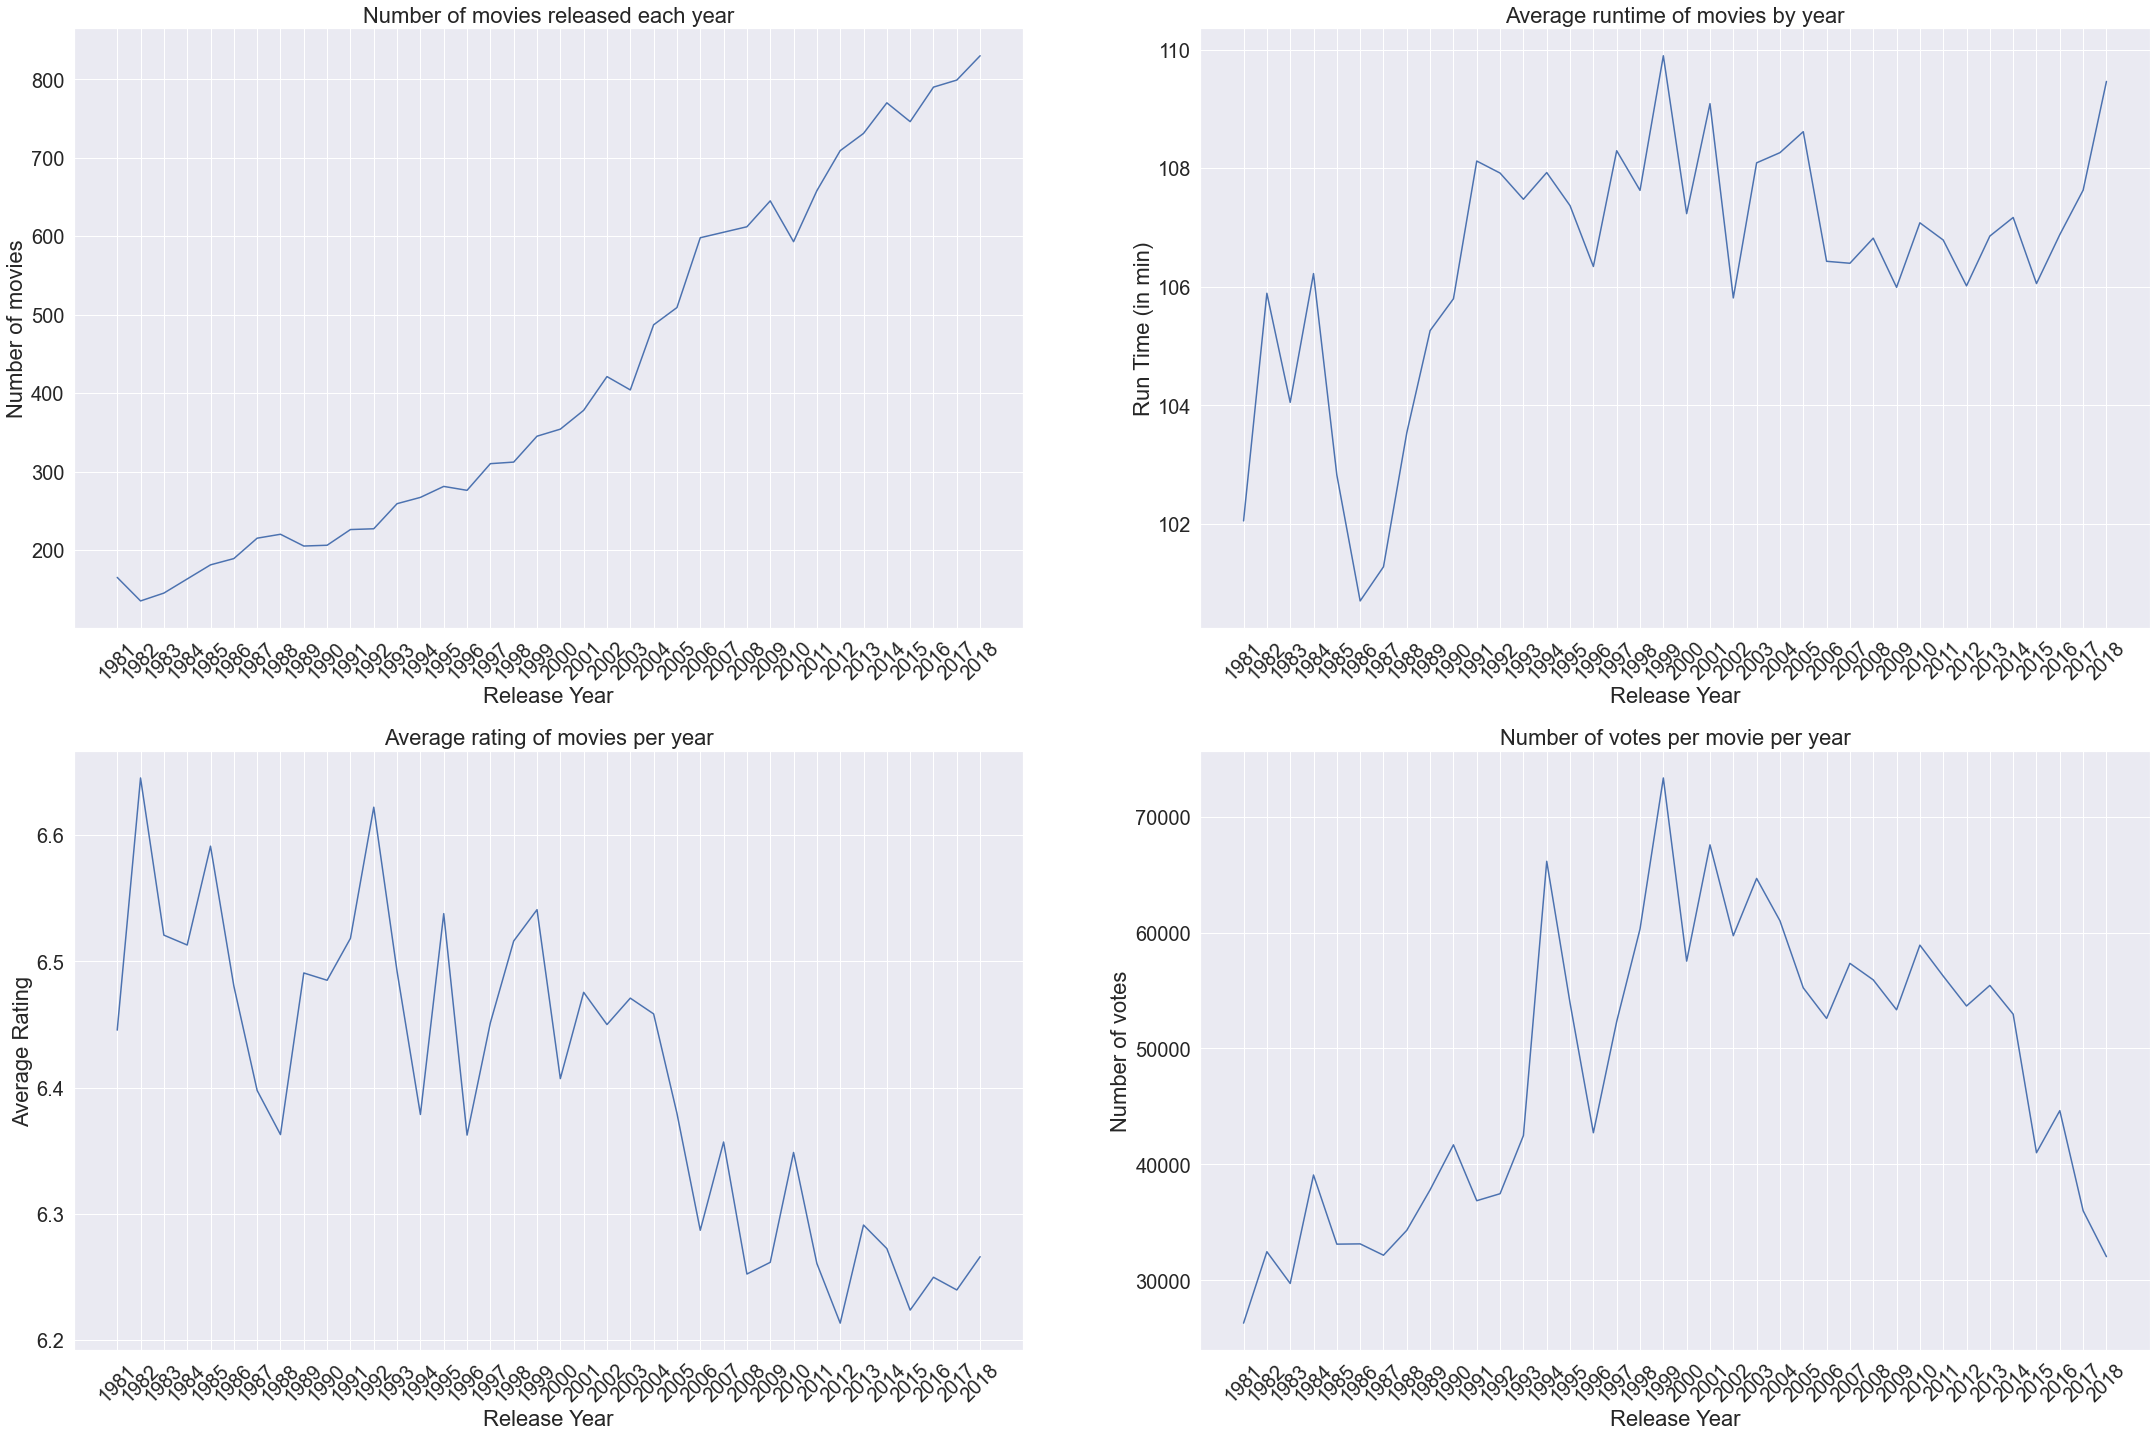

In [19]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)


plt.subplot(2,2,2)
data_filtered.groupby('year')['runtime'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(data_filtered['year']), max(data_filtered['year'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(2,2,1)
data_filtered.groupby('year')['title_id'].count().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of movies',fontsize=22)
plt.xticks(np.arange(min(data_filtered['year']), max(data_filtered['year'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year',fontsize=22)

plt.subplot(2,2,3)
data_filtered.groupby('year')['rating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Average Rating',fontsize=22)
plt.xticks(np.arange(min(data_filtered['year']), max(data_filtered['year'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year',fontsize=22)

plt.subplot(2,2,4)
data_filtered.groupby('year')['numVotes'].mean().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of votes',fontsize=22)
plt.title('Number of votes per movie per year',fontsize=22)
plt.xticks(np.arange(min(data_filtered['year']), max(data_filtered['year'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)

In [20]:
# Calculate number of movies (cumulative) against number of votes
data_filtered[data_filtered.numVotes<=3000].groupby(['numVotes'])['title_id'].count().cumsum()

numVotes
2571       2
2572       5
2573       6
2574      10
2575      13
        ... 
2996    1220
2997    1222
2998    1226
2999    1228
3000    1232
Name: title_id, Length: 403, dtype: int64

Text(0.5, 1.0, 'Max runtime of movies by year')

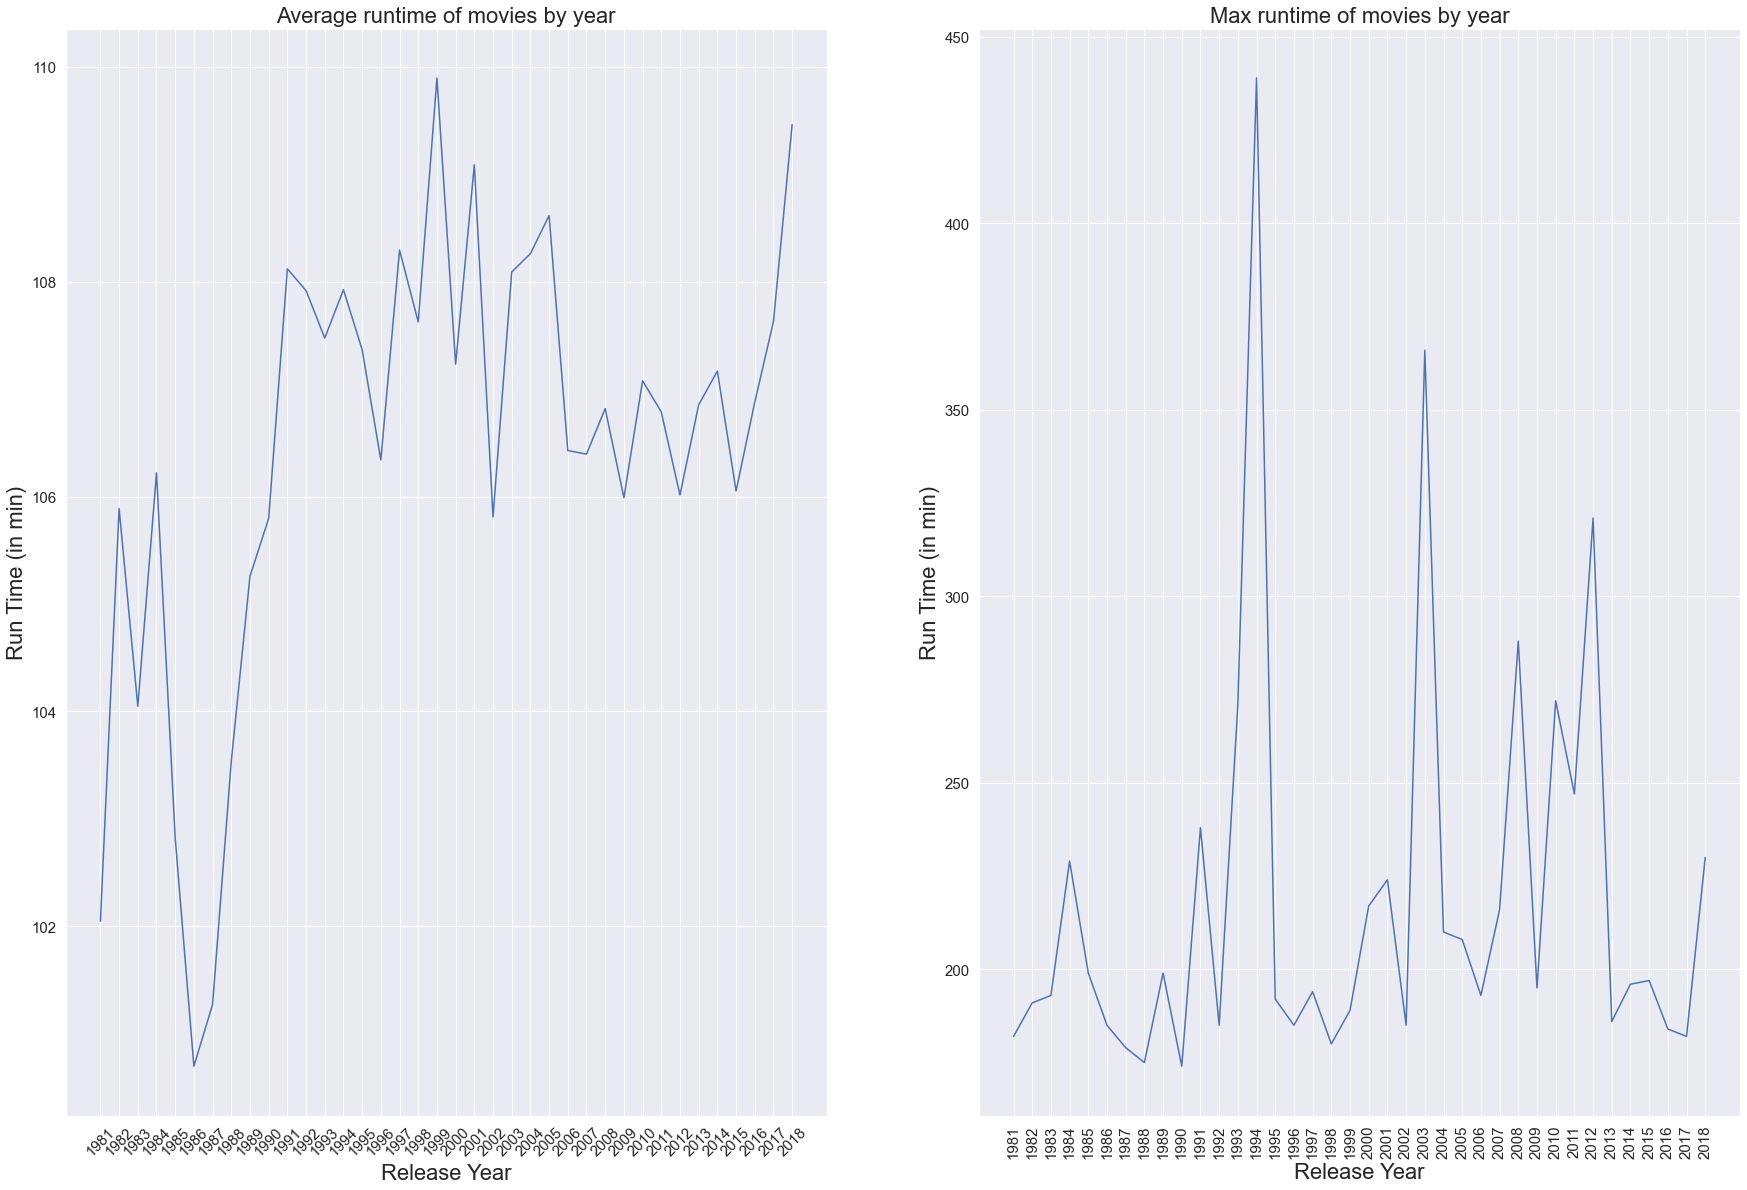

In [21]:
# Trend of Maximum runtime of movies 

plt.figure(figsize=(30,20))
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.subplot(1,2,1)
data_filtered.groupby('year')['runtime'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(data_filtered['year']), max(data_filtered['year'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(1,2,2)
data_filtered.groupby('year')['runtime'].max().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(data_filtered['year']), max(data_filtered['year'])+1, 1.0),rotation=90)
plt.title('Max runtime of movies by year',fontsize=22)

In [22]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

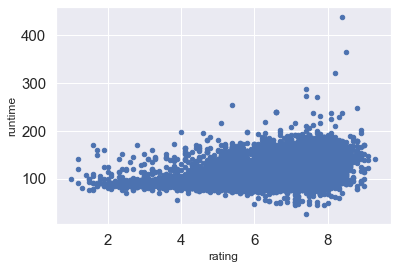

In [23]:
data_filtered.plot(x='rating', y='runtime',kind='scatter');

In [24]:
# Due to variability in data before 1989, only titles released after 1989 are to be considered

#Filtering out data after 1989: titles_new
titles_new=data_filtered[data_filtered.year>=1989]
titles_new.head()

title_id                  title_name  rating  year  numVotes  genre1  \
592   tt0035423              Kate & Leopold     6.4  2001     81880  Comedy   
2629  tt0066498                     The Ear     7.8  1990      2743   Drama   
2826  tt0069049  The Other Side of the Wind     6.8  2018      6916   Drama   
3962  tt0084548               Interrogation     8.0  1989      3196   Crime   
4831  tt0093833             Redneck Zombies     4.2  1989      3030  Comedy   

        genre2    genre3            actor1               actor2  \
592    Fantasy   Romance          Meg Ryan         Hugh Jackman   
2629  Thriller         0  Jirina Bohdalová  Radoslav Brzobohatý   
2826         0         0       John Huston            Oja Kodar   
3962     Drama  Thriller    Krystyna Janda         Adam Ferency   
4831    Horror         0        Steve Sooy      Anthony M. Carr   

                 actor3             actor4     director_name  runtime  \
592      Liev Schreiber      Breckin Meyer     James Mangold      118   
2629   Gustav Opocenský     Miroslav Holub     Karel Kachyna       94   
2826  Peter Bogdanovich    Susan Strasberg      Orson Welles      122   
3962       Janusz Gajos  Agnieszka Holland  Ryszard Bugajski      118   
4831          Ken Davis        Stan Morrow   Pericles Lewnes       84   

      rating_rounded  
592              6.0  
2629             8.0  
2826             7.0  
3962             8.0  
4831             4.0

In [25]:
titles_new.shape

(14553, 15)

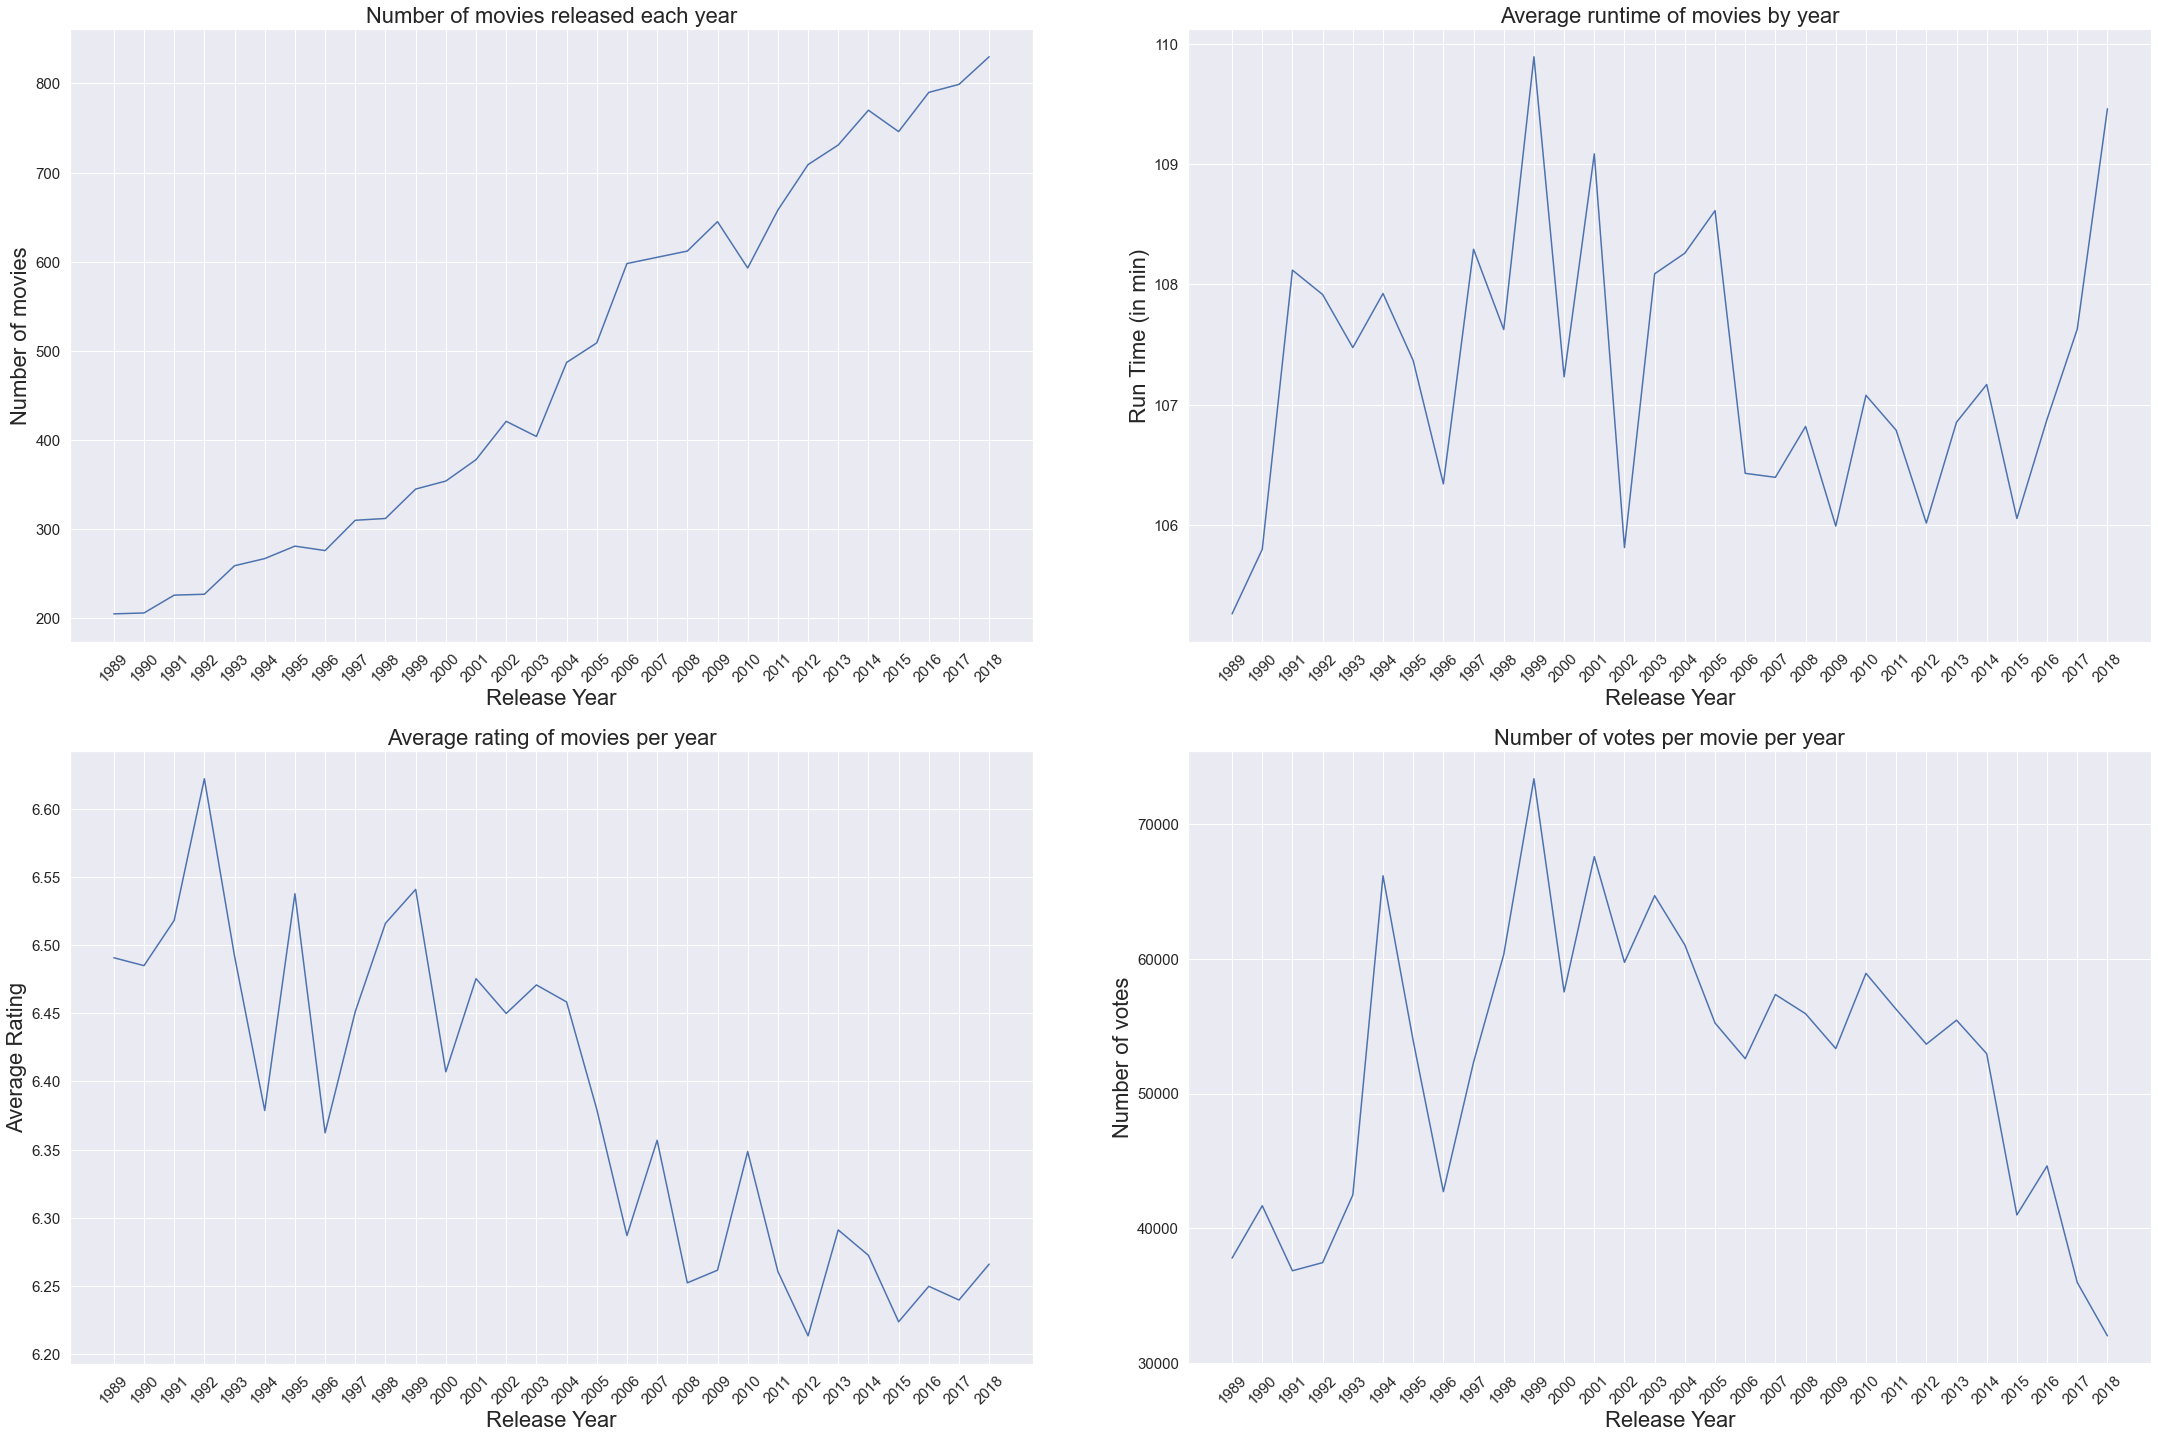

In [26]:
# Yearwise trends for different features

plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.subplot(2,2,2)
titles_new.groupby('year')['runtime'].mean().plot()
plt.ylabel('Run Time (in min)',fontsize=22)
plt.xlabel('Release Year',fontsize=22)
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=45)
plt.title('Average runtime of movies by year',fontsize=22)

plt.subplot(2,2,1)
titles_new.groupby('year')['title_id'].count().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of movies',fontsize=22)
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=45)
plt.title('Number of movies released each year',fontsize=22)

plt.subplot(2,2,3)
titles_new.groupby('year')['rating'].mean().plot()
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Average Rating',fontsize=22)
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=45)
plt.title('Average rating of movies per year',fontsize=22)

plt.subplot(2,2,4)
titles_new.groupby('year')['numVotes'].mean().plot()
plt.xlabel('Release Year',fontsize=22)
plt.ylabel('Number of votes',fontsize=22)
plt.title('Number of votes per movie per year',fontsize=22)
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=45)

plt.tight_layout(pad=.4, w_pad=4.0, h_pad=1.0)

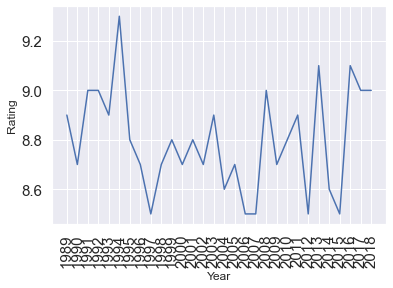

In [27]:
titles_new.groupby('year')['rating'].max().plot()
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=90)
plt.show()

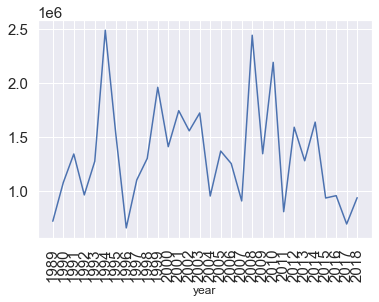

In [28]:
titles_new.groupby('year')['numVotes'].max().plot()
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=90)
plt.show()

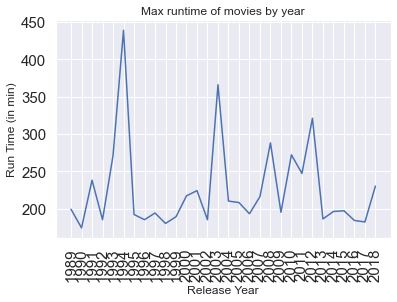

In [29]:
titles_new.groupby('year')['runtime'].max().plot()
plt.ylabel('Run Time (in min)')
plt.xlabel('Release Year')
plt.xticks(np.arange(min(titles_new['year']), max(titles_new['year'])+1, 1.0),rotation=90)
plt.title('Max runtime of movies by year')
plt.show()

<AxesSubplot:xlabel='rating', ylabel='runtime'>

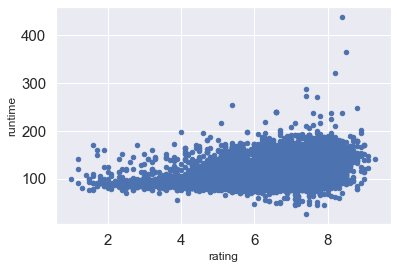

In [30]:
titles_new.plot(x='rating', y='runtime',kind='scatter')

In [31]:
# Generate a unique list of genres
genre_pre_list=list(titles_new.genre1.unique())
genre_list=set([])
for i in genre_pre_list:
    i=str(i).split(",")
    for n in i:
        genre_list.add(n)
        
# Add columns to titles dataframe for different genres along with true/false values
for genre1 in genre_list:
    titles_new["genre_"+genre1]= titles_new['genre1'].str.contains(genre1)

In [32]:
titles_new.head()

title_id                  title_name  rating  year  numVotes  genre1  \
592   tt0035423              Kate & Leopold     6.4  2001     81880  Comedy   
2629  tt0066498                     The Ear     7.8  1990      2743   Drama   
2826  tt0069049  The Other Side of the Wind     6.8  2018      6916   Drama   
3962  tt0084548               Interrogation     8.0  1989      3196   Crime   
4831  tt0093833             Redneck Zombies     4.2  1989      3030  Comedy   

        genre2    genre3            actor1               actor2  ...  \
592    Fantasy   Romance          Meg Ryan         Hugh Jackman  ...   
2629  Thriller         0  Jirina Bohdalová  Radoslav Brzobohatý  ...   
2826         0         0       John Huston            Oja Kodar  ...   
3962     Drama  Thriller    Krystyna Janda         Adam Ferency  ...   
4831    Horror         0        Steve Sooy      Anthony M. Carr  ...   

     genre_Western genre_Mystery genre_Biography  genre_Documentary  \
592          False         False           False              False   
2629         False         False           False              False   
2826         False         False           False              False   
3962         False         False           False              False   
4831         False         False           False              False   

      genre_Musical  genre_War  genre_Action  genre_Thriller  genre_Comedy  \
592           False      False         False           False          True   
2629          False      False         False           False         False   
2826          False      False         False           False         False   
3962          False      False         False           False         False   
4831          False      False         False           False          True   

      genre_Animation  
592             False  
2629            False  
2826            False  
3962            False  
4831            False  

[5 rows x 34 columns]

In [33]:
# Generate a unique list of genres
genre_pre_list=list(titles_new.genre2.unique())
genre_list=set([])
for i in genre_pre_list:
    i=str(i).split(",")
    for n in i:
        genre_list.add(n)
        
# Add columns to titles dataframe for different genres along with true/false values
for genre2 in genre_list:
    titles_new["genre_"+genre2]= titles_new['genre2'].str.contains(genre1)

In [34]:
titles_new.head()

title_id                  title_name  rating  year  numVotes  genre1  \
592   tt0035423              Kate & Leopold     6.4  2001     81880  Comedy   
2629  tt0066498                     The Ear     7.8  1990      2743   Drama   
2826  tt0069049  The Other Side of the Wind     6.8  2018      6916   Drama   
3962  tt0084548               Interrogation     8.0  1989      3196   Crime   
4831  tt0093833             Redneck Zombies     4.2  1989      3030  Comedy   

        genre2    genre3            actor1               actor2  ...  \
592    Fantasy   Romance          Meg Ryan         Hugh Jackman  ...   
2629  Thriller         0  Jirina Bohdalová  Radoslav Brzobohatý  ...   
2826         0         0       John Huston            Oja Kodar  ...   
3962     Drama  Thriller    Krystyna Janda         Adam Ferency  ...   
4831    Horror         0        Steve Sooy      Anthony M. Carr  ...   

     genre_Musical genre_War genre_Action  genre_Thriller  genre_Comedy  \
592          False     False        False           False         False   
2629         False     False        False           False         False   
2826         False     False        False           False         False   
3962         False     False        False           False         False   
4831         False     False        False           False         False   

      genre_Animation  genre_News  genre_Sport  genre_History  genre_0  
592             False       False        False          False    False  
2629            False       False        False          False    False  
2826            False       False        False          False    False  
3962            False       False        False          False    False  
4831            False       False        False          False    False  

[5 rows x 38 columns]

In [35]:
# Generate a unique list of genres
genre_pre_list=list(titles_new.genre3.unique())
genre_list=set([])
for i in genre_pre_list:
    i=str(i).split(",")
    for n in i:
        genre_list.add(n)
        
# Add columns to titles dataframe for different genres along with true/false values
for genre3 in genre_list:
    titles_new["genre_"+genre3]= titles_new['genre3'].str.contains(genre3)

In [36]:
titles_new.head()

title_id                  title_name  rating  year  numVotes  genre1  \
592   tt0035423              Kate & Leopold     6.4  2001     81880  Comedy   
2629  tt0066498                     The Ear     7.8  1990      2743   Drama   
2826  tt0069049  The Other Side of the Wind     6.8  2018      6916   Drama   
3962  tt0084548               Interrogation     8.0  1989      3196   Crime   
4831  tt0093833             Redneck Zombies     4.2  1989      3030  Comedy   

        genre2    genre3            actor1               actor2  ...  \
592    Fantasy   Romance          Meg Ryan         Hugh Jackman  ...   
2629  Thriller         0  Jirina Bohdalová  Radoslav Brzobohatý  ...   
2826         0         0       John Huston            Oja Kodar  ...   
3962     Drama  Thriller    Krystyna Janda         Adam Ferency  ...   
4831    Horror         0        Steve Sooy      Anthony M. Carr  ...   

     genre_War genre_Action genre_Thriller  genre_Comedy  genre_Animation  \
592      False        False          False         False            False   
2629     False        False          False         False            False   
2826     False        False          False         False            False   
3962     False        False           True         False            False   
4831     False        False          False         False            False   

      genre_News  genre_Sport  genre_History  genre_0  genre_Short  
592        False        False          False    False        False  
2629       False        False          False     True        False  
2826       False        False          False     True        False  
3962       False        False          False    False        False  
4831       False        False          False     True        False  

[5 rows x 39 columns]

In [37]:
titles_new.columns

Index(['title_id', 'title_name', 'rating', 'year', 'numVotes', 'genre1',
       'genre2', 'genre3', 'actor1', 'actor2', 'actor3', 'actor4',
       'director_name', 'runtime', 'rating_rounded', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Adventure', 'genre_Family', 'genre_Music',
       'genre_Drama', 'genre_Crime', 'genre_Horror', 'genre_Fantasy',
       'genre_Western', 'genre_Mystery', 'genre_Biography',
       'genre_Documentary', 'genre_Musical', 'genre_War', 'genre_Action',
       'genre_Thriller', 'genre_Comedy', 'genre_Animation', 'genre_News',
       'genre_Sport', 'genre_History', 'genre_0', 'genre_Short'],
      dtype='object')

In [38]:
titles_new.drop(columns=['genre_0'],axis=1,inplace=True)
titles_new.columns

Index(['title_id', 'title_name', 'rating', 'year', 'numVotes', 'genre1',
       'genre2', 'genre3', 'actor1', 'actor2', 'actor3', 'actor4',
       'director_name', 'runtime', 'rating_rounded', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Adventure', 'genre_Family', 'genre_Music',
       'genre_Drama', 'genre_Crime', 'genre_Horror', 'genre_Fantasy',
       'genre_Western', 'genre_Mystery', 'genre_Biography',
       'genre_Documentary', 'genre_Musical', 'genre_War', 'genre_Action',
       'genre_Thriller', 'genre_Comedy', 'genre_Animation', 'genre_News',
       'genre_Sport', 'genre_History', 'genre_Short'],
      dtype='object')

In [39]:
titles_new.drop(columns=['genre1','genre2','genre3'],axis=1,inplace=True)
titles_new.columns

Index(['title_id', 'title_name', 'rating', 'year', 'numVotes', 'actor1',
       'actor2', 'actor3', 'actor4', 'director_name', 'runtime',
       'rating_rounded', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure',
       'genre_Family', 'genre_Music', 'genre_Drama', 'genre_Crime',
       'genre_Horror', 'genre_Fantasy', 'genre_Western', 'genre_Mystery',
       'genre_Biography', 'genre_Documentary', 'genre_Musical', 'genre_War',
       'genre_Action', 'genre_Thriller', 'genre_Comedy', 'genre_Animation',
       'genre_News', 'genre_Sport', 'genre_History', 'genre_Short'],
      dtype='object')

In [40]:
titles_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14553 entries, 592 to 21408
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           14553 non-null  object 
 1   title_name         14553 non-null  object 
 2   rating             14553 non-null  float64
 3   year               14553 non-null  int64  
 4   numVotes           14553 non-null  int64  
 5   actor1             14553 non-null  object 
 6   actor2             14553 non-null  object 
 7   actor3             14553 non-null  object 
 8   actor4             14553 non-null  object 
 9   director_name      14553 non-null  object 
 10  runtime            14553 non-null  int64  
 11  rating_rounded     14553 non-null  float64
 12  genre_Romance      14553 non-null  bool   
 13  genre_Sci-Fi       14553 non-null  bool   
 14  genre_Adventure    14553 non-null  bool   
 15  genre_Family       14553 non-null  bool   
 16  genre_Music        1

In [41]:
titles_new.isnull().sum().sum()

0

There are no null values. Lets check genres that might be applicable to few titles. We will check for such titles and delete the columns for genre entries which are applicable to less than 100 titles.

In [42]:
# Checking number of titles to which each genre entry is applicable
titles_new.sum()

title_id             tt0035423tt0066498tt0069049tt0084548tt0093833t...
title_name           Kate & LeopoldThe EarThe Other Side of the Win...
rating                                                         92302.9
year                                                          29209773
numVotes                                                     751421664
actor1               Meg RyanJirina BohdalováJohn HustonKrystyna Ja...
actor2               Hugh JackmanRadoslav BrzobohatýOja KodarAdam F...
actor3               Liev SchreiberGustav OpocenskýPeter Bogdanovic...
actor4               Breckin MeyerMiroslav HolubSusan StrasbergAgni...
director_name        James MangoldKarel KachynaOrson WellesRyszard ...
runtime                                                        1560660
rating_rounded                                                   92298
genre_Romance                                                     1367
genre_Sci-Fi                                                       533
genre_

In [43]:
# Drop the genre columns that are applicable for lesser than 100 titles

titles_new.drop([col for col, val in titles_new.iloc[:,12:].sum().iteritems() if val < 100], axis=1, inplace=True);

In [44]:
titles_new.sum()

title_id           tt0035423tt0066498tt0069049tt0084548tt0093833t...
title_name         Kate & LeopoldThe EarThe Other Side of the Win...
rating                                                       92302.9
year                                                        29209773
numVotes                                                   751421664
actor1             Meg RyanJirina BohdalováJohn HustonKrystyna Ja...
actor2             Hugh JackmanRadoslav BrzobohatýOja KodarAdam F...
actor3             Liev SchreiberGustav OpocenskýPeter Bogdanovic...
actor4             Breckin MeyerMiroslav HolubSusan StrasbergAgni...
director_name      James MangoldKarel KachynaOrson WellesRyszard ...
runtime                                                      1560660
rating_rounded                                                 92298
genre_Romance                                                   1367
genre_Sci-Fi                                                     533
genre_Adventure                   

In [45]:
titles_new.head()

title_id                  title_name  rating  year  numVotes  \
592   tt0035423              Kate & Leopold     6.4  2001     81880   
2629  tt0066498                     The Ear     7.8  1990      2743   
2826  tt0069049  The Other Side of the Wind     6.8  2018      6916   
3962  tt0084548               Interrogation     8.0  1989      3196   
4831  tt0093833             Redneck Zombies     4.2  1989      3030   

                actor1               actor2             actor3  \
592           Meg Ryan         Hugh Jackman     Liev Schreiber   
2629  Jirina Bohdalová  Radoslav Brzobohatý   Gustav Opocenský   
2826       John Huston            Oja Kodar  Peter Bogdanovich   
3962    Krystyna Janda         Adam Ferency       Janusz Gajos   
4831        Steve Sooy      Anthony M. Carr          Ken Davis   

                 actor4     director_name  ...  genre_Horror  genre_Fantasy  \
592       Breckin Meyer     James Mangold  ...         False          False   
2629     Miroslav Holub     Karel Kachyna  ...         False          False   
2826    Susan Strasberg      Orson Welles  ...         False          False   
3962  Agnieszka Holland  Ryszard Bugajski  ...         False          False   
4831        Stan Morrow   Pericles Lewnes  ...         False          False   

      genre_Mystery  genre_War  genre_Action  genre_Thriller  genre_Comedy  \
592           False      False         False           False         False   
2629          False      False         False           False         False   
2826          False      False         False           False         False   
3962          False      False         False            True         False   
4831          False      False         False           False         False   

      genre_Animation  genre_Sport  genre_History  
592             False        False          False  
2629            False        False          False  
2826            False        False          False  
3962            False        False          False  
4831            False        False          False  

[5 rows x 29 columns]

In [46]:
#We have our dataset ready for analysis. let us look at how the genres affect the ratings.

In [47]:
# Slice genre details from titles dataset to a separate dataset: df_genre
df_genre = [col for col in titles_new if col.startswith('genre_')]
df_genre = titles_new[df_genre].copy()
df_genre['rating'] = titles_new.rating.copy()
df_genre.head()

genre_Romance  genre_Sci-Fi  genre_Adventure  genre_Family  genre_Music  \
592            True         False            False         False        False   
2629          False         False            False         False        False   
2826          False         False            False         False        False   
3962          False         False            False         False        False   
4831          False         False            False         False        False   

      genre_Drama  genre_Crime  genre_Horror  genre_Fantasy  genre_Mystery  \
592         False        False         False          False          False   
2629        False        False         False          False          False   
2826        False        False         False          False          False   
3962        False        False         False          False          False   
4831        False        False         False          False          False   

      genre_War  genre_Action  genre_Thriller  genre_Comedy  genre_Animation  \
592       False         False           False         False            False   
2629      False         False           False         False            False   
2826      False         False           False         False            False   
3962      False         False            True         False            False   
4831      False         False           False         False            False   

      genre_Sport  genre_History  rating  
592         False          False     6.4  
2629        False          False     7.8  
2826        False          False     6.8  
3962        False          False     8.0  
4831        False          False     4.2

In [48]:
# Calculate average rating of each of the genre
genres=[]
avg_rating=[]
for row,col in enumerate(df_genre):
    genres.append(col)
    avg_rating.append(round(df_genre[df_genre[col]==True].rating.mean(),2))
genre = pd.DataFrame({'genres':genres[:-1],'avg_rating':avg_rating[:-1]})
genre

genres  avg_rating
0     genre_Romance        6.48
1      genre_Sci-Fi        6.01
2   genre_Adventure        6.60
3      genre_Family        6.14
4       genre_Music        6.63
5       genre_Drama        6.62
6       genre_Crime        6.29
7      genre_Horror        5.73
8     genre_Fantasy        6.09
9     genre_Mystery        6.28
10        genre_War        6.80
11     genre_Action        6.21
12   genre_Thriller        6.17
13     genre_Comedy        6.26
14  genre_Animation        6.77
15      genre_Sport        6.61
16    genre_History        6.85

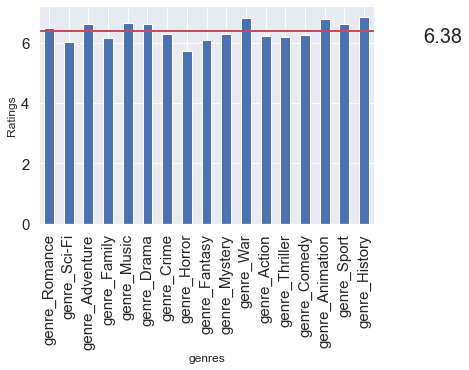

In [49]:
# Plot genre ratings along with mean rating of all genre

genre.plot('genres','avg_rating',kind='bar',legend=False)
plt.axhline(y=np.mean(genre.avg_rating),linewidth=2,color='r')
plt.text(19,6,round(np.mean(genre.avg_rating),2))
plt.ylabel('Ratings')
plt.show()

Genres with higher than average rating are - history, war, animation. So it appears that movies that are based on real life and imagination have a higher rating.

Horror movies are rated much lower than average.

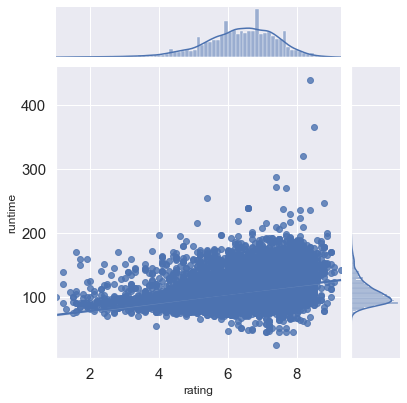

In [50]:
# Plot showing correlation of average rating and runtime minutes
sns.jointplot('rating','runtime', data=titles_new,
              kind='reg')
plt.show()

In [51]:
titles_new.runtime.mean()

107.23974438260153

Observation:
Movie ratings is positively correlated with runtime Minutes. This is evident from the graph above.
Movies with runtime > 200 minutes have better than average ratings
we will now plot the heatmap and calculate the p-value in order to find the correlation between different variables

In [52]:
# Function for calculating p-value matrix for multiple variables

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            df_clean = df.loc[:,[r,c]].dropna()
            pvalues[r][c]=round(stats.spearmanr(df_clean.iloc[:,0], df_clean.iloc[:,1])[1], 4)
    return pvalues

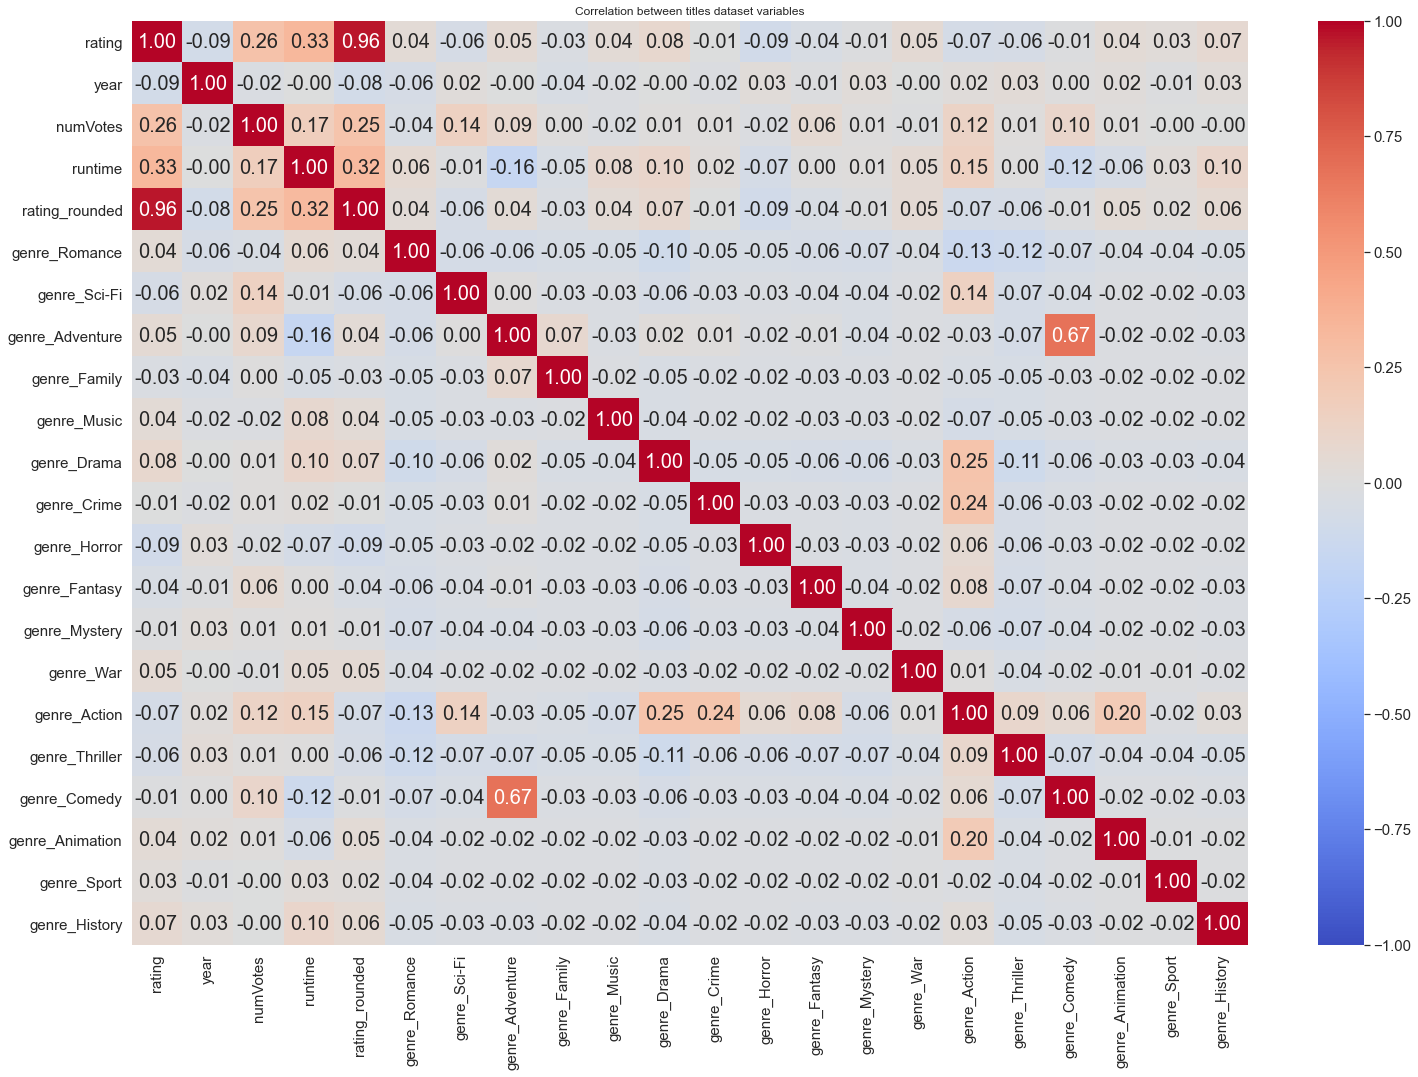

In [53]:
# Plot heatmap

plt.figure(figsize=(25,17))
sns.heatmap(titles_new.corr(), annot=True, fmt='.2f', cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation between titles dataset variables')
plt.show()

In [54]:
titles_new.corr()

rating      year  numVotes   runtime  rating_rounded  \
rating           1.000000 -0.085819  0.263790  0.333073        0.964967   
year            -0.085819  1.000000 -0.023974 -0.002696       -0.084625   
numVotes         0.263790 -0.023974  1.000000  0.165562        0.253466   
runtime          0.333073 -0.002696  0.165562  1.000000        0.318441   
rating_rounded   0.964967 -0.084625  0.253466  0.318441        1.000000   
genre_Romance    0.040630 -0.062140 -0.042905  0.060797        0.037462   
genre_Sci-Fi    -0.059988  0.016942  0.141581 -0.014782       -0.055955   
genre_Adventure  0.048097 -0.001011  0.085581 -0.162808        0.044852   
genre_Family    -0.027848 -0.042939  0.001364 -0.046344       -0.027945   
genre_Music      0.039195 -0.020954 -0.021690  0.076430        0.041802   
genre_Drama      0.078794 -0.002202  0.014740  0.099835        0.072703   
genre_Crime     -0.007374 -0.019199  0.014465  0.015672       -0.007518   
genre_Horror    -0.089872  0.026165 -0.018182 -0.066020       -0.088909   
genre_Fantasy   -0.044268 -0.013117  0.056666  0.002527       -0.042420   
genre_Mystery   -0.011496  0.029471  0.006762  0.010427       -0.010358   
genre_War        0.047673 -0.002767 -0.012558  0.053992        0.051166   
genre_Action    -0.066084  0.016025  0.119118  0.145682       -0.067056   
genre_Thriller  -0.057303  0.031286  0.012779  0.001202       -0.057953   
genre_Comedy    -0.014951  0.002931  0.098607 -0.116779       -0.014704   
genre_Animation  0.043496  0.017455  0.012046 -0.060280        0.045476   
genre_Sport      0.027270 -0.011579 -0.004886  0.028819        0.022570   
genre_History    0.066597  0.027930 -0.003896  0.099738        0.060983   

                 genre_Romance  genre_Sci-Fi  genre_Adventure  genre_Family  \
rating                0.040630     -0.059988         0.048097     -0.027848   
year                 -0.062140      0.016942        -0.001011     -0.042939   
numVotes             -0.042905      0.141581         0.085581      0.001364   
runtime               0.060797     -0.014782        -0.162808     -0.046344   
rating_rounded        0.037462     -0.055955         0.044852     -0.027945   
genre_Romance         1.000000     -0.062779        -0.064112     -0.047736   
genre_Sci-Fi         -0.062779      1.000000         0.003196     -0.028907   
genre_Adventure      -0.064112      0.003196         1.000000      0.074350   
genre_Family         -0.047736     -0.028907         0.074350      1.000000   
genre_Music          -0.047580     -0.028813        -0.029424     -0.021908   
genre_Drama          -0.098049     -0.059375         0.016610     -0.045147   
genre_Crime          -0.051933     -0.031449         0.008964     -0.023913   
genre_Horror         -0.051279     -0.031053        -0.020163     -0.023612   
genre_Fantasy        -0.060418     -0.036587        -0.009654     -0.027820   
genre_Mystery        -0.067000     -0.040573        -0.039636     -0.030851   
genre_War            -0.036234     -0.021942        -0.022408     -0.016684   
genre_Action         -0.132254      0.143186        -0.028214     -0.046384   
genre_Thriller       -0.115140     -0.069725        -0.070073     -0.053017   
genre_Comedy         -0.066069     -0.040009         0.673391     -0.030422   
genre_Animation      -0.035213     -0.021324        -0.021776     -0.016214   
genre_Sport          -0.035522     -0.021511        -0.021968     -0.016356   
genre_History        -0.045179     -0.027359        -0.027940     -0.020803   

                 genre_Music  ...  genre_Horror  genre_Fantasy  genre_Mystery  \
rating              0.039195  ...     -0.089872      -0.044268      -0.011496   
year               -0.020954  ...      0.026165      -0.013117       0.029471   
numVotes           -0.021690  ...     -0.018182       0.056666       0.006762   
runtime             0.076430  ...     -0.066020       0.002527       0.010427   
rating_rounded      0.041802  ...     -0.088909      -0.042420      -0

In [55]:
# Calculate p-values
calculate_pvalues(titles_new)

title_id title_name  rating    year numVotes  actor1  actor2  \
title_id               0     0.5302       0       0        0  0.6681  0.5001   
title_name        0.5302          0  0.0405  0.5684   0.0003  0.8685  0.9402   
rating                 0     0.0405       0       0        0  0.0013  0.0001   
year                   0     0.5684       0       0        0  0.2669  0.1158   
numVotes               0     0.0003       0       0        0  0.1102   0.264   
actor1            0.6681     0.8685  0.0013  0.2669   0.1102       0  0.0032   
actor2            0.5001     0.9402  0.0001  0.1158    0.264  0.0032       0   
actor3            0.0722     0.0937  0.0167   0.028   0.0033  0.7571       0   
actor4            0.0755     0.2941  0.0001  0.0235   0.1227  0.2707  0.0004   
director_name     0.0726     0.8535  0.0001  0.0035   0.5663  0.1013  0.0415   
runtime            0.327     0.9259       0  0.7384        0  0.2373       0   
rating_rounded         0     0.0591       0       0        0  0.0024  0.0002   
genre_Romance          0     0.5764       0       0   0.9036   0.111  0.8124   
genre_Sci-Fi      0.4891     0.7314       0  0.0083        0  0.0848  0.3899   
genre_Adventure   0.0348     0.3948       0  0.9381        0  0.6866  0.2102   
genre_Family           0     0.1499  0.0004       0        0  0.0054  0.5106   
genre_Music       0.0055     0.3429       0  0.0068   0.3143  0.1586   0.602   
genre_Drama       0.6167      0.028       0   0.904        0  0.3364  0.0215   
genre_Crime       0.0416     0.0056  0.0757  0.1017        0  0.6726  0.9566   
genre_Horror      0.0031     0.4414       0  0.0007   0.6898  0.8886  0.5177   
genre_Fantasy     0.0043     0.0172       0  0.1397        0  0.6546  0.0588   
genre_Mystery     0.0012     0.0765   0.003  0.0008   0.0051  0.5459  0.0871   
genre_War         0.9112     0.5304       0  0.6676   0.0006  0.0853  0.4569   
genre_Action      0.1609      0.039       0  0.0029        0  0.1448       0   
genre_Thriller    0.0007     0.0572       0  0.0002        0  0.1121  0.4953   
genre_Comedy      0.0123     0.3153  0.1427  0.7745        0  0.0773  0.1014   
genre_Animation    0.021     0.1198       0  0.0565   0.0052   0.008  0.4909   
genre_Sport       0.0611     0.7648       0  0.1417   0.0267  0.3559  0.0655   
genre_History     0.0022     0.8009       0  0.0002   0.3707  0.1131  0.4859   

                 actor3  actor4 director_name  ... genre_Horror genre_Fantasy  \
title_id         0.0722  0.0755        0.0726  ...       0.0031        0.0043   
title_name       0.0937  0.2941        0.8535  ...       0.4414        0.0172   
rating           0.0167  0.0001        0.0001  ...            0             0   
year              0.028  0.0235        0.0035  ...       0.0007        0.1397   
numVotes         0.0033  0.1227        0.5663  ...       0.6898             0   
actor1           0.7571  0.2707        0.1013  ...       0.8886        0.6546   
actor2                0  0.0004        0.0415  ...       0.5177        0.0588   
actor3                0       0        0.0056  ...       0.1215        0.3083   
actor4                0       0             0  ...       0.6996          0.27   
director_name    0.0056       0             0  ...        0.454        0.8874   
runtime               0       0             0  ...            0        0.1369   
rating_rounded   0.0162       0        0.0001  ...            0             0   
genre_Romance    0.0156  0.9957        0.9335  ...            0             0   
genre_Sci-Fi     0.0007  0.1905        0.1788  ...       0.0002             0   
genre_Adventure  0.9501  0.1182        0.8126  ...        0.015        0.2442   
genre_Family     0.8538  0.5239          0.32  ...       0.0044        0.0008   
genre_Music      0.2542  0.7574        0.7254  ...       0.0045        0.0008   
genre_Drama       0.027  0.0173        0.0104  ...            0             0   
genre_Crime      0.5433  0.0373        0.9368  ...       0.0019        0.000

Observations:
The heatmap shows positive correlation between ratings and runtime
The heatmap shows negative correlation between ratings and year, genres - Crime, fantasy, action, mystery.sci-fi, family, horror, comedy, adventure, thriller. Although there is'nt much correlation between them but the correlation exists is negative.

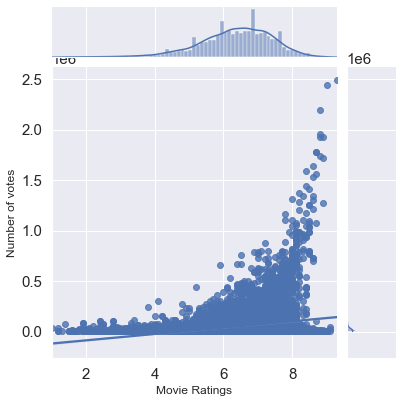

In [56]:
#plt.plot(titles.averageRating,titles.numVotes,marker='.', linestyle='none')
sns.jointplot('rating','numVotes', data=titles_new,
              kind='reg')

plt.xlabel('Movie Ratings')
plt.ylabel('Number of votes')
plt.show()

The variable numVotes could not be used to predict the ratings, as this will not be available to us during prediction. We have still plotted the above plot to get some insights, as follows:

Number of votes for a movie are positively correlated to the rating.
Most of the cases of high vote count are for highly rated movies. From this we can conclude that people are more likely to vote for movies if they like it.


As part of the in-depth analysis, we need to wrangle the dataset again to prepare it for analysis.

In [57]:
#checking for NaN values
titles_new.isna().sum().sum()

0

In [58]:
titles_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14553 entries, 592 to 21408
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_id         14553 non-null  object 
 1   title_name       14553 non-null  object 
 2   rating           14553 non-null  float64
 3   year             14553 non-null  int64  
 4   numVotes         14553 non-null  int64  
 5   actor1           14553 non-null  object 
 6   actor2           14553 non-null  object 
 7   actor3           14553 non-null  object 
 8   actor4           14553 non-null  object 
 9   director_name    14553 non-null  object 
 10  runtime          14553 non-null  int64  
 11  rating_rounded   14553 non-null  float64
 12  genre_Romance    14553 non-null  bool   
 13  genre_Sci-Fi     14553 non-null  bool   
 14  genre_Adventure  14553 non-null  bool   
 15  genre_Family     14553 non-null  bool   
 16  genre_Music      14553 non-null  bool   
 17  genre_Dram

There might be some cast/crew that affects the ratings of the movies. It is not possible to incorporate all the crew members.

In order to incorporate the cast/crew, we are considering the 10 most frequent cast/crew each in the top-rated (rating 8 and above) and bottom-rated (rating 4 and below) movies.

In [59]:
titles_new.columns

Index(['title_id', 'title_name', 'rating', 'year', 'numVotes', 'actor1',
       'actor2', 'actor3', 'actor4', 'director_name', 'runtime',
       'rating_rounded', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure',
       'genre_Family', 'genre_Music', 'genre_Drama', 'genre_Crime',
       'genre_Horror', 'genre_Fantasy', 'genre_Mystery', 'genre_War',
       'genre_Action', 'genre_Thriller', 'genre_Comedy', 'genre_Animation',
       'genre_Sport', 'genre_History'],
      dtype='object')

In [60]:
t1 = titles_new.nlargest(4500,'rating').title_id.value_counts().reset_index()
t2 = titles_new.nsmallest(4500,'rating').title_id.value_counts().reset_index()

titles_new['crew'] = titles_new.actor1.str.cat(titles_new.actor1,sep=",",na_rep='').str.cat(titles_new.actor2,sep=",",na_rep='').str.cat(titles_new.actor3,sep=",",na_rep='').str.cat(titles_new.actor4,sep=",",na_rep='').str.cat(titles_new.director_name,sep=",",na_rep='')
titles_new.iloc[:,5:].head()


actor1               actor2             actor3  \
592           Meg Ryan         Hugh Jackman     Liev Schreiber   
2629  Jirina Bohdalová  Radoslav Brzobohatý   Gustav Opocenský   
2826       John Huston            Oja Kodar  Peter Bogdanovich   
3962    Krystyna Janda         Adam Ferency       Janusz Gajos   
4831        Steve Sooy      Anthony M. Carr          Ken Davis   

                 actor4     director_name  runtime  rating_rounded  \
592       Breckin Meyer     James Mangold      118             6.0   
2629     Miroslav Holub     Karel Kachyna       94             8.0   
2826    Susan Strasberg      Orson Welles      122             7.0   
3962  Agnieszka Holland  Ryszard Bugajski      118             8.0   
4831        Stan Morrow   Pericles Lewnes       84             4.0   

      genre_Romance  genre_Sci-Fi  genre_Adventure  ...  genre_Fantasy  \
592            True         False            False  ...          False   
2629          False         False            False  ...          False   
2826          False         False            False  ...          False   
3962          False         False            False  ...          False   
4831          False         False            False  ...          False   

      genre_Mystery  genre_War  genre_Action  genre_Thriller  genre_Comedy  \
592           False      False         False           False         False   
2629          False      False         False           False         False   
2826          False      False         False           False         False   
3962          False      False         False            True         False   
4831          False      False         False           False         False   

      genre_Animation  genre_Sport  genre_History  \
592             False        False          False   
2629            False        False          False   
2826            False        False          False   
3962            False        False          False   
4831            False        False          False   

                                                   crew  
592   Meg Ryan,Meg Ryan,Hugh Jackman,Liev Schreiber,...  
2629  Jirina Bohdalová,Jirina Bohdalová,Radoslav Brz...  
2826  John Huston,John Huston,Oja Kodar,Peter Bogdan...  
3962  Krystyna Janda,Krystyna Janda,Adam Ferency,Jan...  
4831  Steve Sooy,Steve Sooy,Anthony M. Carr,Ken Davi...  

[5 rows x 25 columns]

In [61]:
for i in t1[:10]['index']:
        titles_new[i] = titles_new.crew.str.contains(i)
        
for i in t2[:10]['index']:
        titles_new[i] = titles_new.crew.str.contains(i)

In [62]:
titles_new.iloc[:,29:].head() 

crew  tt0401711  tt0113187  \
592   Meg Ryan,Meg Ryan,Hugh Jackman,Liev Schreiber,...      False      False   
2629  Jirina Bohdalová,Jirina Bohdalová,Radoslav Brz...      False      False   
2826  John Huston,John Huston,Oja Kodar,Peter Bogdan...      False      False   
3962  Krystyna Janda,Krystyna Janda,Adam Ferency,Jan...      False      False   
4831  Steve Sooy,Steve Sooy,Anthony M. Carr,Ken Davi...      False      False   

      tt0106364  tt0411098  tt1640718  tt0304808  tt0421625  tt1422122  \
592       False      False      False      False      False      False   
2629      False      False      False      False      False      False   
2826      False      False      False      False      False      False   
3962      False      False      False      False      False      False   
4831      False      False      False      False      False      False   

      tt0462322  ...  tt1763316  tt1935896  tt1333125  tt3704538  tt2926810  \
592       False  ...      False      False      False      False      False   
2629      False  ...      False      False      False      False      False   
2826      False  ...      False      False      False      False      False   
3962      False  ...      False      False      False      False      False   
4831      False  ...      False      False      False      False      False   

      tt5345298  tt2087850  tt4163020  tt4419364  tt2105044  
592       False      False      False      False      False  
2629      False      False      False      False      False  
2826      False      False      False      False      False  
3962      False      False      False      False      False  
4831      False      False      False      False      False  

[5 rows x 21 columns]

In [63]:
titles_new.columns

Index(['title_id', 'title_name', 'rating', 'year', 'numVotes', 'actor1',
       'actor2', 'actor3', 'actor4', 'director_name', 'runtime',
       'rating_rounded', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure',
       'genre_Family', 'genre_Music', 'genre_Drama', 'genre_Crime',
       'genre_Horror', 'genre_Fantasy', 'genre_Mystery', 'genre_War',
       'genre_Action', 'genre_Thriller', 'genre_Comedy', 'genre_Animation',
       'genre_Sport', 'genre_History', 'crew', 'tt0401711', 'tt0113187',
       'tt0106364', 'tt0411098', 'tt1640718', 'tt0304808', 'tt0421625',
       'tt1422122', 'tt0462322', 'tt3521164', 'tt1763316', 'tt1935896',
       'tt1333125', 'tt3704538', 'tt2926810', 'tt5345298', 'tt2087850',
       'tt4163020', 'tt4419364', 'tt2105044'],
      dtype='object')

In [64]:
titles_new.shape

(14553, 50)

In [65]:
titles_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14553 entries, 592 to 21408
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_id         14553 non-null  object 
 1   title_name       14553 non-null  object 
 2   rating           14553 non-null  float64
 3   year             14553 non-null  int64  
 4   numVotes         14553 non-null  int64  
 5   actor1           14553 non-null  object 
 6   actor2           14553 non-null  object 
 7   actor3           14553 non-null  object 
 8   actor4           14553 non-null  object 
 9   director_name    14553 non-null  object 
 10  runtime          14553 non-null  int64  
 11  rating_rounded   14553 non-null  float64
 12  genre_Romance    14553 non-null  bool   
 13  genre_Sci-Fi     14553 non-null  bool   
 14  genre_Adventure  14553 non-null  bool   
 15  genre_Family     14553 non-null  bool   
 16  genre_Music      14553 non-null  bool   
 17  genre_Dram

In [66]:
#Fetch features of type Object
objFeatures = titles_new.select_dtypes(include="object").columns

#Iterate a loop for features of type object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feat in objFeatures:
    titles_new[feat] = le.fit_transform(titles_new[feat].astype(str))
 

In [67]:
titles_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14553 entries, 592 to 21408
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_id         14553 non-null  int32  
 1   title_name       14553 non-null  int32  
 2   rating           14553 non-null  float64
 3   year             14553 non-null  int64  
 4   numVotes         14553 non-null  int64  
 5   actor1           14553 non-null  int32  
 6   actor2           14553 non-null  int32  
 7   actor3           14553 non-null  int32  
 8   actor4           14553 non-null  int32  
 9   director_name    14553 non-null  int32  
 10  runtime          14553 non-null  int64  
 11  rating_rounded   14553 non-null  float64
 12  genre_Romance    14553 non-null  bool   
 13  genre_Sci-Fi     14553 non-null  bool   
 14  genre_Adventure  14553 non-null  bool   
 15  genre_Family     14553 non-null  bool   
 16  genre_Music      14553 non-null  bool   
 17  genre_Dram

In [68]:
# Check if scaling is needed

titles_new.describe()

title_id    title_name        rating          year      numVotes  \
count  14553.000000  14553.000000  14553.000000  14553.000000  1.455300e+04   
mean    6742.073937   6515.322202      6.342534   2007.130695  5.163345e+04   
std     3861.419812   3753.673137      1.078624      7.996819  1.289198e+05   
min        0.000000      0.000000      1.000000   1989.000000  2.571000e+03   
25%     3424.000000   3280.000000      5.700000   2001.000000  4.476000e+03   
50%     6746.000000   6515.000000      6.400000   2008.000000  9.940000e+03   
75%    10081.000000   9760.000000      7.100000   2014.000000  3.829200e+04   
max    13407.000000  13009.000000      9.300000   2018.000000  2.485697e+06   

             actor1        actor2        actor3        actor4  director_name  \
count  14553.000000  14553.000000  14553.000000  14553.000000   14553.000000   
mean    2727.135780   3572.216519   4200.003642   4764.764791    3425.511304   
std     1583.828207   2076.234178   2493.745850   2810.595470    1932.094123   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%     1357.000000   1780.000000   2013.000000   2333.000000    1769.000000   
50%     2670.000000   3536.000000   4159.000000   4728.000000    3457.000000   
75%     4138.000000   5401.000000   6377.000000   7234.000000    5115.000000   
max     5500.000000   7221.000000   8559.000000   9619.000000    6704.000000   

            runtime  rating_rounded          crew  
count  14553.000000    14553.000000  14553.000000  
mean     107.239744        6.342197   7257.139628  
std       21.352117        1.120547   4191.752152  
min       25.000000        1.000000      0.000000  
25%       93.000000        6.000000   3625.000000  
50%      102.000000        6.000000   7261.000000  
75%      117.000000        7.000000  10889.000000  
max      439.000000        9.000000  14509.000000

We do not need to scale as there is not much variance in any of the features

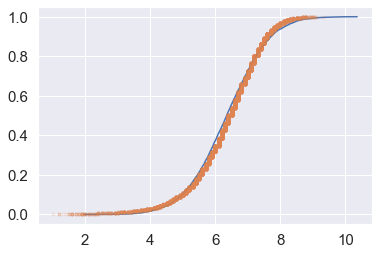

In [69]:
# Check the movie ratings for normality

mean=titles_new.rating.mean()
std=titles_new.rating.std()
samples=np.random.normal(mean,std,10000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x,y = ecdf(titles_new.rating)
x_theor, y_theor = ecdf(samples)
_ = plt.plot(x_theor,y_theor)

_ = plt.plot(x,y,marker='.',linestyle='none',alpha=.1)

The ratings appear to be normal

Now our final dataset is ready to carry out machine learning operations.

Machine Learning Process and Methodology: 

To find the best model for our purpose, we will train our data on different algorithms, compare their performance based on the root mean square error (rmse) of the prediction and time taken to fit/predict the model, and select the best.

Algorithms employed:

Linear Regression
Regularization Model - Ridge
Regularization Model - Lasso
Ensemble Model - Random Forest
Ensemble Model - Gradient Boost
Ensemble Model - Ada Boost

After training and evaluating our data on the above algorithms, we will also use model stacking.

Stack - Linear Regression
Stack - Random Forest
Stack - Gradient Boost

In [70]:
from sklearn.model_selection import train_test_split

# Define the feature and target variables

X = titles_new.drop(labels=['title_id','rating','numVotes'],axis=1)
y = titles_new.rating

# Split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state = 1)


In [71]:
# Data Frame to store all the RMSE scores for various algorithms

algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSE'] = None
algo_score['Test RMSE'] = None

# algo_score['Validation RMSE'] = None

algo_score['Hyperparameters'] = None
algo_score['Training+Test Time(sec)'] = None

cv_time = []

# Dataframes for second level of predictions. Collect the predicted y values for training and test set of data

ypred_train = pd.DataFrame(index = X_train.index)
ypred_test = pd.DataFrame(index = X_test.index)

ypred_train['actualRating'], ypred_test['actualRating'] = y_train, y_test

We will define functions to measure the model, apply cross validation, and predict on train and test datasets. We have not included model fitting in the functions as that will happen as part of hyperparameter tuning

In [72]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Error)

def rmse(y_actual, y_pred):
    rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
    return rmse
rmse_cv = make_scorer(rmse, greater_is_better=False)

plot_true_vs_pred: This is used to plot True and Predicted count values for a particular time interval

In [73]:
# Plots True vs. Predicted count values

def plot_true_vs_pred (y_actual, y_pred):
    fig = plt.figure(figsize=(18, 16))
    
    pred_val = pd.DataFrame({'actual':y_actual,'predicted':y_pred})
    pred_val['error']=abs(pred_val.actual-pred_val.predicted)
    sns.swarmplot(pred_val.actual.round(0),pred_val.error)
    
    plt.show()

In [74]:
# Function to predict on train and test data and return the required metrics
def model_fit(model, X_train, y_train, X_test, y_test):
    ''' 
    Input:
        model = model to be applied
        X_train y_train = Training data
        X_test, y_test = Testing data
    Output:
        rmse for training and test data 
        predicted y for training and test data
    
    '''
    #model.fit(X_train, y_train)
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    rmse_train = rmse(y_train, y_train_predict)
    rmse_test = rmse(y_test, y_test_predict)
    
    rmse_all = [rmse_train, rmse_test]
    y_pred_all = [y_train_predict, y_test_predict]
    
    return(rmse_all, y_pred_all)

In [75]:
from sklearn.model_selection import cross_val_predict
def cross_val(model, X_train, y_train, cv=5):

    y_pred = cross_val_predict(model,X_train,y_train,cv=5)

    rmse_train = rmse(y_train,y_pred)
    return(rmse_train, y_pred)

### Linear Regression

In [76]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [77]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

param_summary = ['','']

%time reg.fit(X_train, y_train)
%time rmse_summary, y_predict_summary = model_fit(reg, X_train, y_train, X_test, y_test)

ypred_test['LR'] = y_predict_summary[1]  
ypred_train['LR'] = y_predict_summary[0]

algo_score.loc['Linear Regression'] = rmse_summary+param_summary

Wall time: 76.5 ms
Wall time: 72.1 ms


In [78]:
algo_score.loc['Linear Regression', 'Training+Test Time(sec)'] = 0.214
cv_time.append(0.214)
algo_score

Train RMSE  Test RMSE Hyperparameters  \
Modelling Algo                                             
Linear Regression    0.280865   0.280315                   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214

Observations

Not an overfit model - both train and test RMSE are more or less similar

In [79]:
# Features and the Estimated Linear Regression Coefficients

df_coeff = pd.DataFrame({'features': X_train.columns, 'Lin_Coeff': reg.coef_})

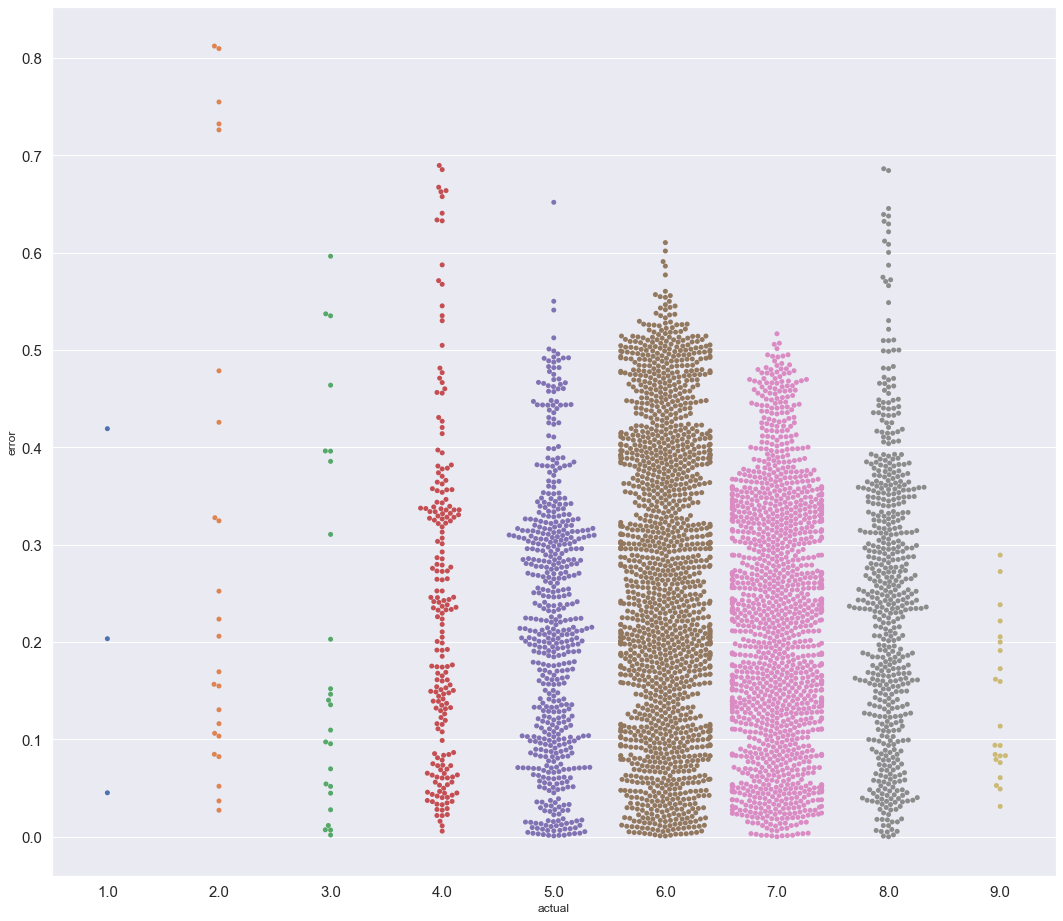

In [80]:
# Linear Regression Plot: True vs. Predicted

plot_true_vs_pred(y_test,y_predict_summary[1]);

## Regularization Model - Ridge

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning

param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

Wall time: 3.65 s
Best alpha for Ridge Regression Model: {'alpha': 50}


In [82]:
# Fine tune Hyperparameter for edge cases

param_grid = {'alpha': np.arange(1,3,.25)}
ridge = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time ridge.fit(X_train, y_train)
print('Best alpha for Ridge Regression Model: {}'.format(ridge.best_params_))

Wall time: 2.88 s
Best alpha for Ridge Regression Model: {'alpha': 2.75}


In [83]:
param_summary = [ridge.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ridge, X_train, y_train, X_test, y_test)

ypred_test['Ridge'] = y_predict_summary[1]  
ypred_train['Ridge'] = y_predict_summary[0]

algo_score.loc['Ridge Regression'] = rmse_summary+param_summary

Wall time: 78.3 ms


In [84]:
algo_score.loc['Ridge Regression', 'Training+Test Time(sec)'] = 5.414
cv_time.append(5.414)
algo_score

Train RMSE  Test RMSE  Hyperparameters  \
Modelling Algo                                              
Linear Regression    0.280865   0.280315                    
Ridge Regression     0.280865   0.280314  {'alpha': 2.75}   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414

Observations

Ridge gives almost similar performance as Linear Regression. It is not an overfit model

In [85]:
# Features and the Estimated Ridge Regression Coefficients

df_coeff['Ridge_Coeff'] = ridge.best_estimator_.coef_

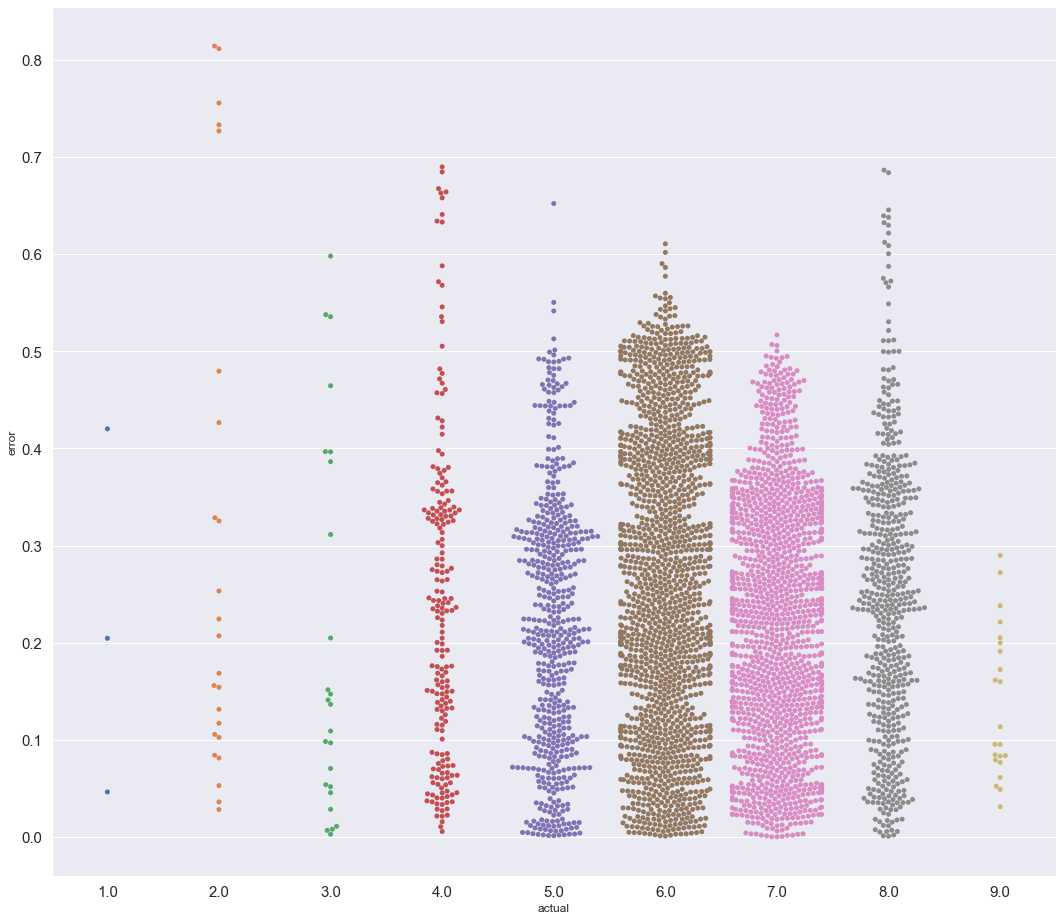

In [86]:
plot_true_vs_pred(y_test,y_predict_summary[1])

## Regularization Model - Lasso

In [87]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

Wall time: 5.33 s
Best alpha for Lasso Regression Model: {'alpha': 0.1}


In [88]:
# Fine tune Hyperparameter for edge case

param_grid = {'alpha': np.arange(.01,.2,.01)}#[.025,0.05, 0.1, 0.15]}
lasso = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmse_cv)
%time lasso.fit(X_train, y_train)
print('Best alpha for Lasso Regression Model: {}'.format(lasso.best_params_))

Wall time: 21.2 s
Best alpha for Lasso Regression Model: {'alpha': 0.01}


In [89]:
param_summary = [lasso.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(lasso, X_train, y_train, X_test, y_test)
ypred_test['Lasso'] = y_predict_summary[1]
ypred_train['Lasso'] = y_predict_summary[0]

algo_score.loc['Lasso Regression'] = rmse_summary+param_summary

Wall time: 70.1 ms


In [90]:
algo_score.loc['Lasso Regression', 'Training+Test Time(sec)'] = 59.968
cv_time.append(59.968)
algo_score

Train RMSE  Test RMSE  Hyperparameters  \
Modelling Algo                                              
Linear Regression    0.280865   0.280315                    
Ridge Regression     0.280865   0.280314  {'alpha': 2.75}   
Lasso Regression     0.281799   0.280919  {'alpha': 0.01}   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414  
Lasso Regression                   59.968

Observations

Lasso regression is showing a poorer performance than Linear and Ridge regression, in terms of time

In [91]:
# Features and the Estimated Lasso Regression Coefficients

df_coeff['Lasso_Coeff'] = lasso.best_estimator_.coef_

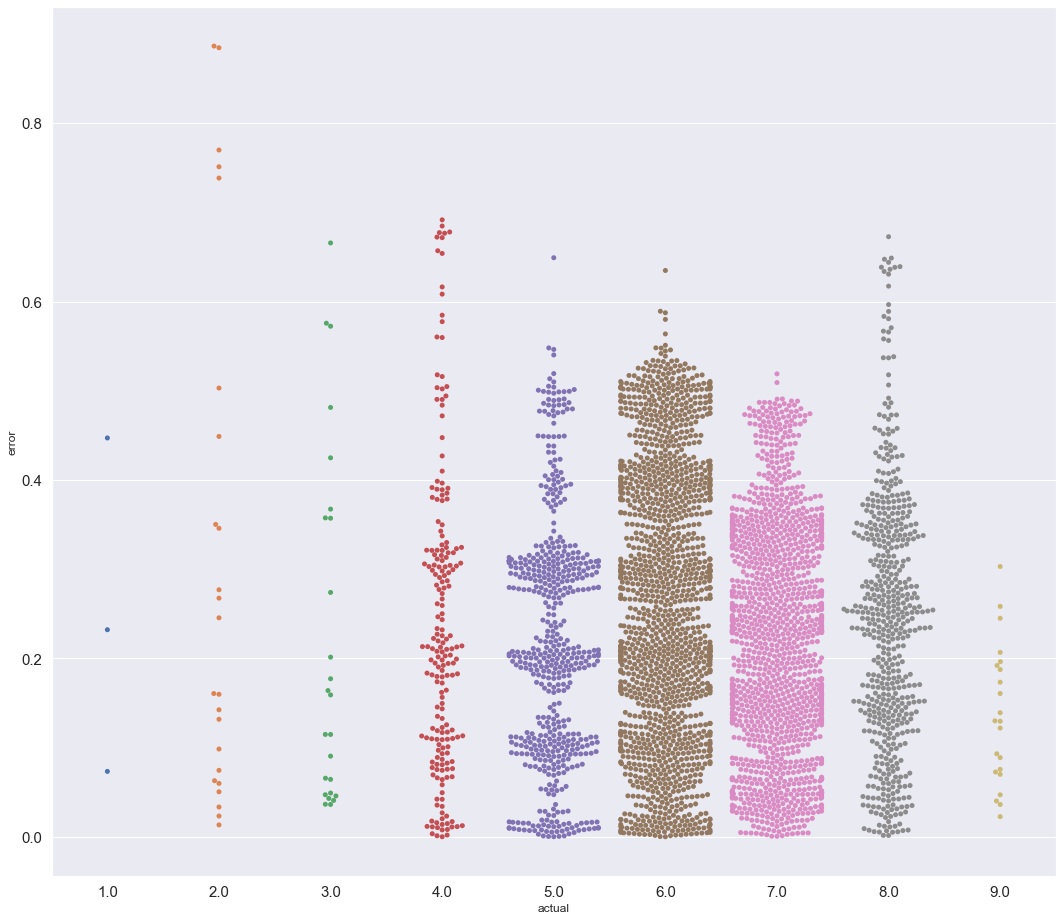

In [92]:
plot_true_vs_pred(y_test,y_predict_summary[1])

## Plotting the coefficients obtained from Linear, Ridge and Lasso regression

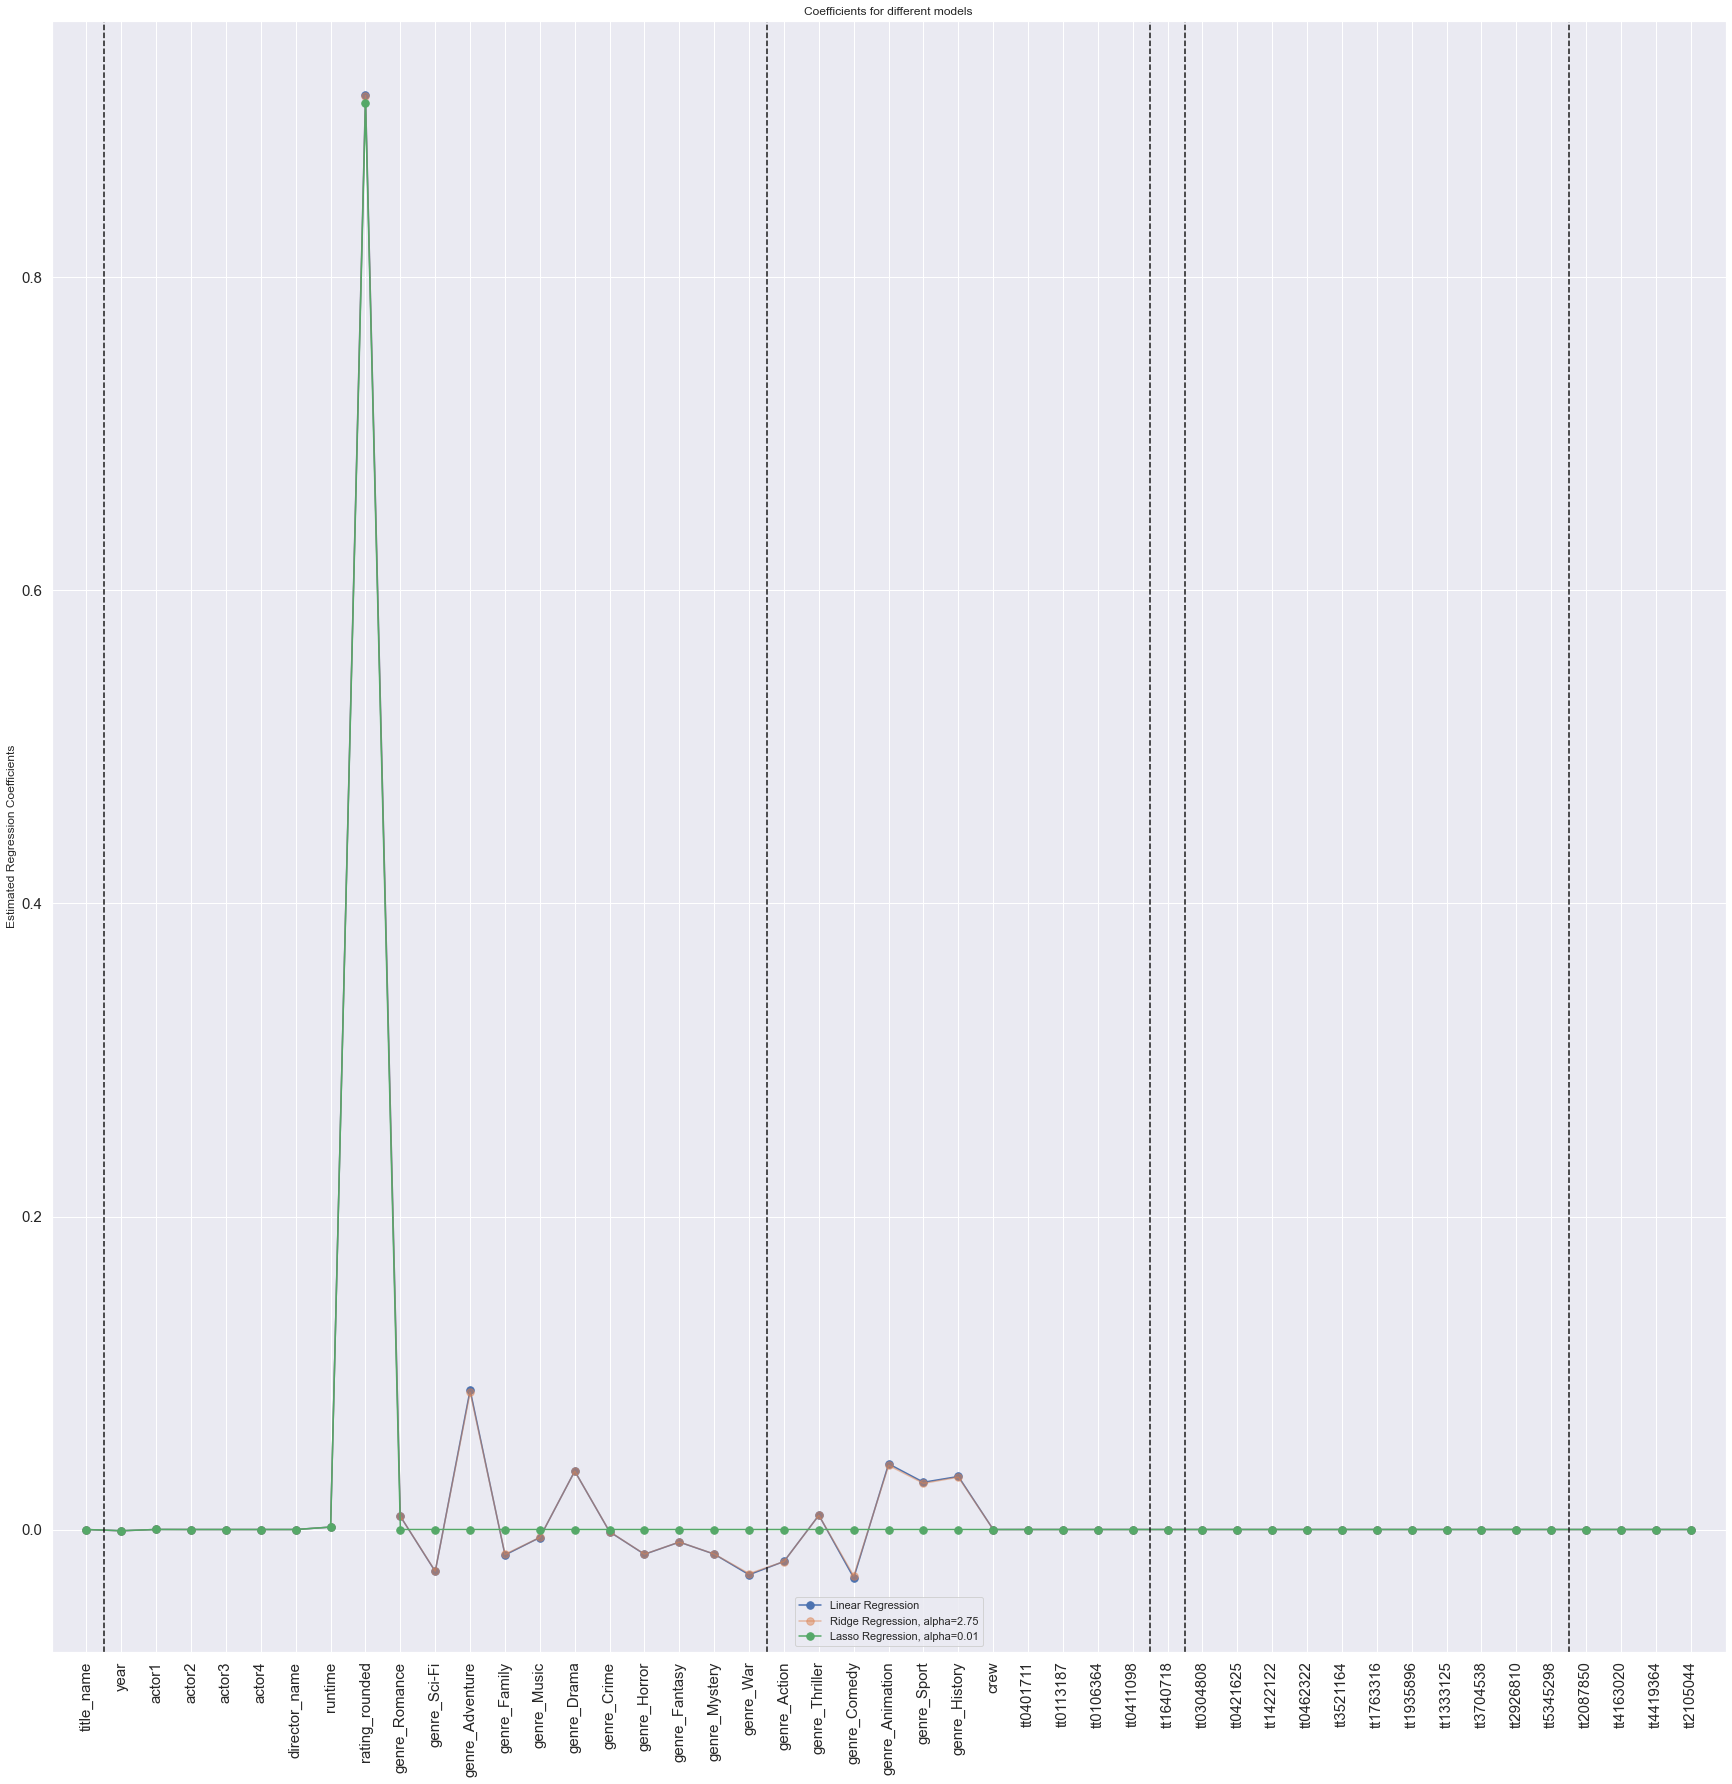

In [93]:
fig = plt.figure(figsize=(30, 30))

axes = fig.add_subplot(1, 1, 1)
axes.plot(df_coeff.Lin_Coeff, label='Linear Regression', marker='.', markersize=15)
axes.plot(df_coeff.Ridge_Coeff, label='Ridge Regression, alpha={}'.format(ridge.best_params_['alpha']), alpha=.5,marker='.', markersize=15)
axes.plot(df_coeff.Lasso_Coeff, label='Lasso Regression, alpha={}'.format(lasso.best_params_['alpha']), marker='.', markersize=15)
axes.axvline(1-0.5, c='k', ls='--')
axes.axvline(20-0.5,  c='k', ls='--')
axes.axvline(31-0.5,  c='k', ls='--')
axes.axvline(32-0.5,  c='k', ls='--')
axes.axvline(43-0.5,  c='k', ls='--')
plt.xticks(range(len(df_coeff.Lin_Coeff)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for different models')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff)])
axes.legend()

Observations

As expected from the minimizing function, Linear Regression coefficients are most agressive (highest magnitude). Ridge Regression coefficients closely follow Linear Regression. Lasso more or less nullifies most of the coefficients.
From the Linear and Ridge coefficient plots, we can see that movie ratings have:
maximum dependency on genre, rating and no dependency on presence/absence of top 10 cast/crew.

## Ensemble Model - Random Forest

In [94]:
# Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [95]:
# Tuning the hyperparameters

param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10],'bootstrap': [True,False]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
rf_main.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.4s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.5s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=80, bootstrap=True, total=   6.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=60, bootstrap=True 
[CV]  n_estimators=1000, min_sample

[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True, total=   5.9s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True, total=   5.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True, total=   5.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True, total=   5.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=250, min_

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=30, bootstrap=False, total=  49.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False, total= 3.9min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False, total= 3.7min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False, total= 3.6min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estim

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=100, bootstrap=True, total= 1.2min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=100, bootstrap=True, total= 1.2min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=  20.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=  20.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, 

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False, total=  54.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False, total=  54.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False, total=  55.0s
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, bootstrap=False, total= 7.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=5

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True, total=  30.5s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True, total=  30.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True, total=  30.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=80, bootstrap=True, total=  31.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=100, min

[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=  21.9s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=  22.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=  23.3s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True, total=  22.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=True 
[CV]  n_estimators=250, min_samples_

[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_features=log2, max_depth=10, bootstrap=False, total=   3.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False, total=  33.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False, total=  32.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False, total=  32.6s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=False 
[CV]  n

[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=40, bootstrap=False, total=  29.6s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=40, bootstrap=False, total=  28.2s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=70, bootstrap=True, total=   3.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=70, bootstrap=True, total=   3.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=250, min_sampl

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False, total=   1.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False, total=   1.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=80, bootstrap=False, total=   1.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  15.6s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=500, min_

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True, total=   5.5s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True, total=   5.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True, total=   5.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=90, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True, total=  12.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True, total=  11.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True, total=  11.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True, total=  12.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=1

[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=100, bootstrap=True, total=   2.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 2.9min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 2.9min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 2.9min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, mi

[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.0s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=80, bootstrap=False, total=   1.0s
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=50, bootstrap=True, total= 1.2min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=50, bootstrap=True, total= 1.2min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=5000, min

[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=10, bootstrap=True, total=  45.2s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=10, bootstrap=True, total=  45.5s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=10, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=10, bootstrap=True, total=  48.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, bootstrap=False, total=  30.0s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=250,

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 660.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 7, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000, 2000, 5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [96]:
# Following code uses the best parameters generated above to fit the model

param_distributions = {'n_estimators': [5000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[50], 'min_samples_split':[10],'bootstrap': [False]}
rf_main = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time rf_main.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.5min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total= 2.4min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.2min finished


Wall time: 15min 13s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [False], 'max_depth': [50],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [10],
                                        'n_estimators': [5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [97]:
param_summary = [rf_main.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_main, X_train, y_train, X_test, y_test)
ypred_test['RF'] = y_predict_summary[1]
ypred_train['RF'] = y_predict_summary[0]

algo_score.loc['Random Forest'] = rmse_summary+param_summary

Wall time: 24.1 s


In [98]:
algo_score.loc['Random Forest', 'Training+Test Time(sec)'] = 662.80
cv_time.append(662.80)
algo_score

Train RMSE  Test RMSE  \
Modelling Algo                             
Linear Regression    0.280865   0.280315   
Ridge Regression     0.280865   0.280314   
Lasso Regression     0.281799   0.280919   
Random Forest        0.157057   0.344355   

                                                     Hyperparameters  \
Modelling Algo                                                         
Linear Regression                                                      
Ridge Regression                                     {'alpha': 2.75}   
Lasso Regression                                     {'alpha': 0.01}   
Random Forest      {'n_estimators': 5000, 'min_samples_split': 10...   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414  
Lasso Regression                   59.968  
Random Forest                       662.8

## Visualize the mean score against different values for n estimators

In [99]:
# Testing for edge case

param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[50], 'min_samples_split':[10],'bootstrap': [False]}
test_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
test_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False, total=   1.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=100, min

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 23.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [False], 'max_depth': [50],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [10],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000, 2000, 5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [100]:
print('Best parameters for Random Forest Regression Model: {}'.format(test_rf.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 5000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [101]:
rf_result=pd.DataFrame(test_rf.cv_results_)
rf_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.155079      0.077933         0.038069        0.007226   
1       2.683785      0.346969         0.076174        0.018798   
2       7.800601      0.191190         0.194620        0.026003   
3      15.623798      0.290089         0.391201        0.037282   
4      30.702903      0.431386         0.814493        0.052507   
5      60.730877      0.641266         1.517293        0.092194   
6     156.526943      1.030636         3.798314        0.155520   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                 50                      10                      1   
1                100                      10                      1   
2                250                      10                      1   
3                500                      10                      1   
4               1000                      10                      1   
5               2000                      10                      1   
6               5000                      10                      1   

  param_max_features param_max_depth param_bootstrap  \
0               sqrt              50           False   
1               sqrt              50           False   
2               sqrt              50           False   
3               sqrt              50           False   
4               sqrt              50           False   
5               sqrt              50           False   
6               sqrt              50           False   

                                              params  split0_test_score  \
0  {'n_estimators': 50, 'min_samples_split': 10, ...          -0.364726   
1  {'n_estimators': 100, 'min_samples_split': 10,...          -0.363461   
2  {'n_estimators': 250, 'min_samples_split': 10,...          -0.355255   
3  {'n_estimators': 500, 'min_samples_split': 10,...          -0.359839   
4  {'n_estimators': 1000, 'min_samples_split': 10...          -0.357204   
5  {'n_estimators': 2000, 'min_samples_split': 10...          -0.356686   
6  {'n_estimators': 5000, 'min_samples_split': 10...          -0.355397   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -0.382306          -0.358682          -0.366421          -0.363862   
1          -0.383043          -0.359362          -0.374287          -0.363038   
2          -0.366271          -0.352203          -0.366289          -0.358194   
3          -0.364634          -0.356621          -0.367023          -0.361408   
4          -0.363006          -0.353251          -0.364996          -0.360160   
5          -0.363333          -0.354454          -0.366388          -0.360156   
6          -0.362228          -0.352221          -0.365497          -0.358651   

   mean_test_score  std_test_score  rank_test_score  
0        -0.367200        0.007983                6  
1        -0.368638        0.008759                7  
2        -0.359643        0.005741                2  
3        -0.361905        0.003635                5  
4        -0.359723        0.004171                3  
5        -0.360203        0.004323                4  
6        -0.358799        0.004722                1

In [102]:
est_score = rf_result.groupby('param_n_estimators')['mean_test_score'].mean()
est_score

param_n_estimators
50     -0.367200
100    -0.368638
250    -0.359643
500    -0.361905
1000   -0.359723
2000   -0.360203
5000   -0.358799
Name: mean_test_score, dtype: float64

[Text(0.5, 0, 'n_estimators'),
 Text(0, 0.5, 'Mean CV Test Score'),
 Text(0.5, 1.0, 'n_estimators vs. Score (best_n_estimator = 5000)')]

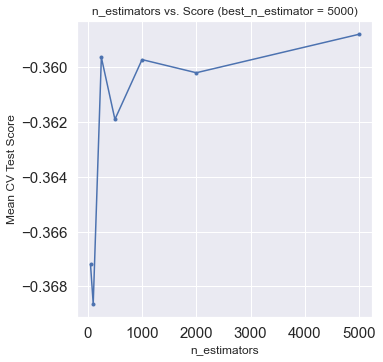

In [103]:
fig=plt.figure(figsize=(18, 12))

axes=fig.add_subplot(2, 3, 1)
axes.plot(est_score.index, est_score.values, marker='.')
axes.set(xlabel='n_estimators', ylabel='Mean CV Test Score', title='n_estimators vs. Score (best_n_estimator = 5000)')

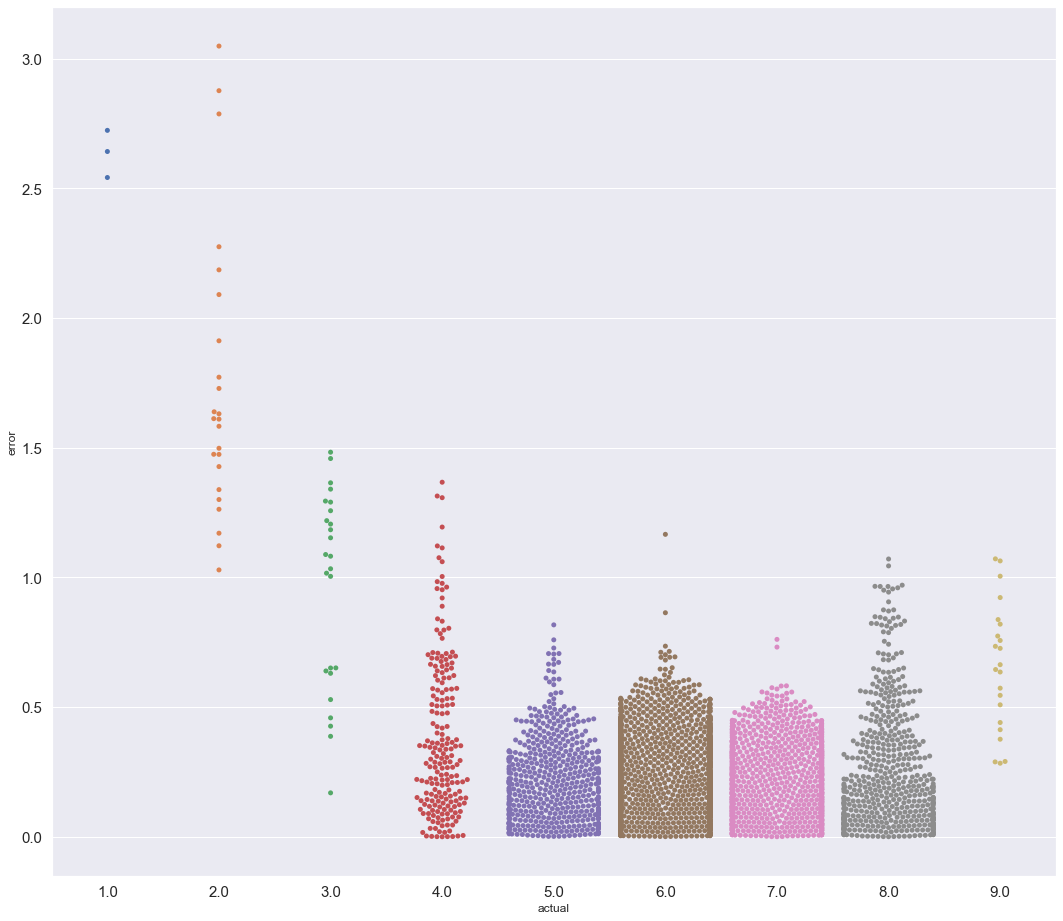

In [104]:
plot_true_vs_pred(y_test,y_predict_summary[1])

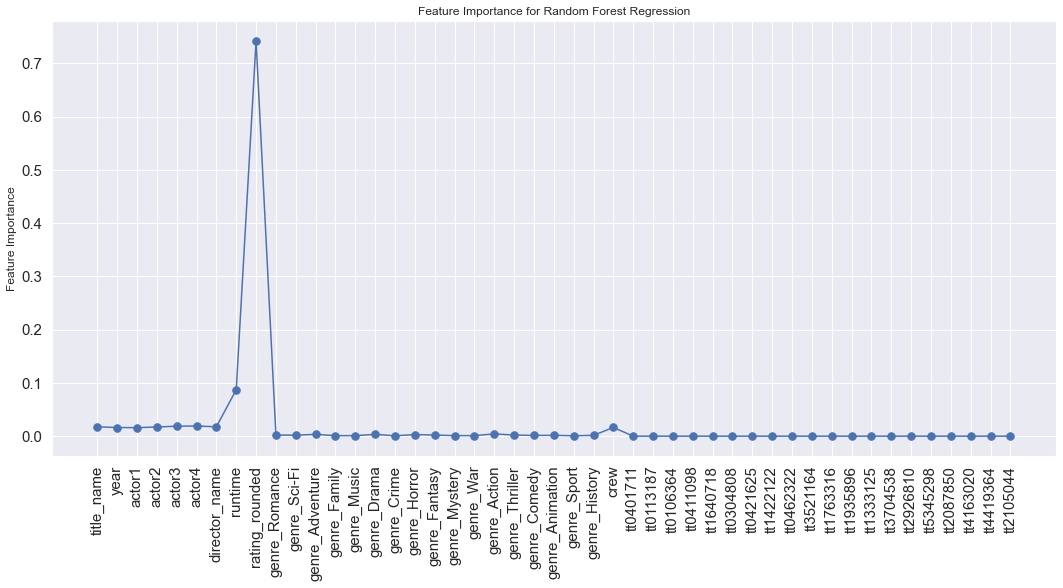

In [105]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_main.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_main.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression')

plt.show()

## Ensemble Method - Gradient Boost

In [106]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [107]:
# Tuning the hyperparameters
param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'learning_rate':[0.01, 0.02, 0.05, 0.1],'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10]}
grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
grad_boost.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02, total=  26.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02, total=  30.5s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02, total=  31.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02, total=  31.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=30, learning_rate=0.02, total=  32.0s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.0

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=60, learning_rate=0.1, total= 1.3min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.02, total=15.4min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.02, total=15.8min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, learning_rate=0.02, total=17.0min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=90, le

[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, learning_rate=0.01, total=  34.9s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, learning_rate=0.01, total=  34.9s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=80, learning_rate=0.01, total=  35.0s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.1 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.1, total= 2.5min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02, total=  16.7s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02, total=  16.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02, total=  15.9s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02, total=  16.4s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05, total=   1.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05, total=   1.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, learning_rate=0.01, total=   9.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, learning_rate=0.01, total=   9.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=10, learning_rate=0.01 
[CV]

[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05, total=  18.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05, total=  17.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05, total=  18.3s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=50, learning_rate=0.05, total=  18.0s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=80, learning_rate=0.02, total= 1.3min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.05, total= 1.8min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.05, total= 1.8min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.05, total= 1.8min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, learning_rate=0.

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.02, total=  17.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.02 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.02, total=  17.0s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.02 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.02, total=  17.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, learning_rate=0.02, total= 6.3min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=20, learning_rate=0.

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02, total= 1.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02, total= 1.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02, total= 1.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.02, total= 1.5min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=90, learning_rate=0.

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, learning_rate=0.05, total= 1.5min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, learning_rate=0.05 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, learning_rate=0.05, total= 1.5min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=60, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=60, learning_rate=0.01, total= 1.2min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=60, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=60, learning_rate=0.01, total= 1.3min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=60, learning_rate

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05, total=   2.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05, total=   2.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05, total=   2.6s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=60, learning_rate=0.05, total=   2.7s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=60, learning_rate=0.02 
[CV] 

[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=30, learning_rate=0.1, total=   1.5s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05, total=   1.0s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05, total=   1.0s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05, total=   1.0s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=log2, max_depth=70, learning_rate=0.05 

[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=40, learning_rate=0.1, total=  10.1s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=40, learning_rate=0.1 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=40, learning_rate=0.1, total=  10.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=40, learning_rate=0.1 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=40, learning_rate=0.1, total=  10.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1, total=  19.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_esti

[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01, total=  45.2s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01, total=  44.9s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01, total=  44.9s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.01, total=  47.0s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, learning_rate=0.

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, learning_rate=0.05, total= 4.7min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, learning_rate=0.05, total= 4.8min
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.05, total=  20.8s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.05, total=  20.9s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=50, learning_rate=0.

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total=10.6min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total=10.5min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total=10.5min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total=10.9min


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 1477.1min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.05,
                                                          0.1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 7, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000, 2000, 5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [108]:
print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

Best parameters for Gradient Boost Model: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.02}


Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}
Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}

In [109]:
# Following code uses the best parameters generated above to fit the model

from sklearn.ensemble import GradientBoostingRegressor

param_distributions = {'n_estimators': [500], 'learning_rate':[0.01],'max_features':['sqrt'], 'min_samples_leaf':[10], 'max_depth':[60], 'min_samples_split':[2]}
grad_boost = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, n_iter = 100,cv=5, scoring=rmse_cv)
%time grad_boost.fit(X_train, y_train)

Wall time: 1min 12s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01],
                                        'max_depth': [60],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [10],
                                        'min_samples_split': [2],
                                        'n_estimators': [500]},
                   scoring=make_scorer(rmse, greater_is_better=False))

In [110]:
print('Best parameters for Gradient Boost Model: {}'.format(grad_boost.best_params_))

Best parameters for Gradient Boost Model: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 60, 'learning_rate': 0.01}


In [111]:
param_summary = [grad_boost.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(grad_boost, X_train, y_train, X_test, y_test)
ypred_test['GB'] = y_predict_summary[1]
ypred_train['GB'] = y_predict_summary[0]

algo_score.loc['Gradient Boost'] = rmse_summary+param_summary

Wall time: 1.2 s


In [112]:
algo_score.loc['Gradient Boost', 'Training+Test Time(sec)'] = 89.796
cv_time.append(89.796)
algo_score

Train RMSE  Test RMSE  \
Modelling Algo                             
Linear Regression    0.280865   0.280315   
Ridge Regression     0.280865   0.280314   
Lasso Regression     0.281799   0.280919   
Random Forest        0.157057   0.344355   
Gradient Boost       0.151231   0.297279   

                                                     Hyperparameters  \
Modelling Algo                                                         
Linear Regression                                                      
Ridge Regression                                     {'alpha': 2.75}   
Lasso Regression                                     {'alpha': 0.01}   
Random Forest      {'n_estimators': 5000, 'min_samples_split': 10...   
Gradient Boost     {'n_estimators': 500, 'min_samples_split': 2, ...   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414  
Lasso Regression                   59.968  
Random Forest                       662.8  
Gradient Boost                     89.796

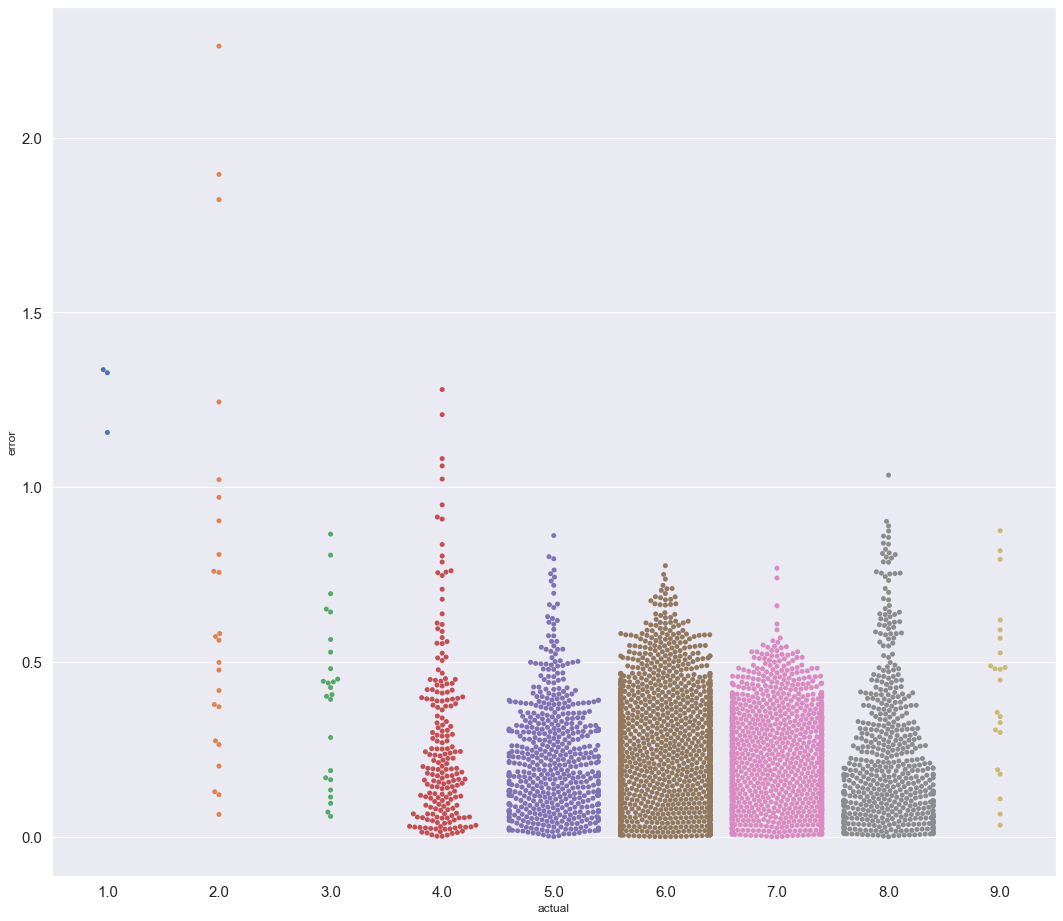

In [113]:
plot_true_vs_pred(y_test,y_predict_summary[1])

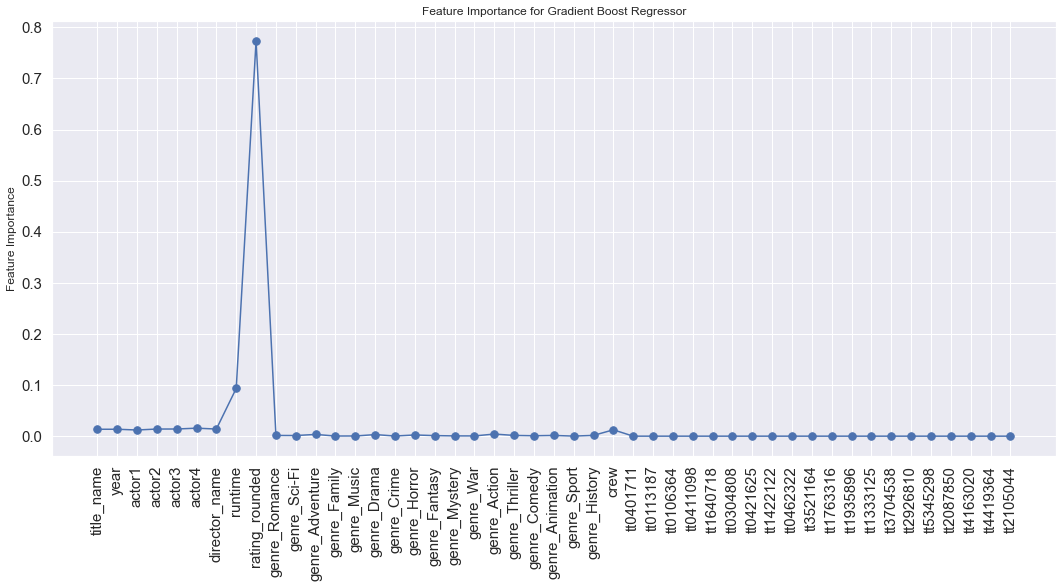

In [114]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(grad_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(grad_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Gradient Boost Regressor')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

## Ensemble Method - Adaboost

In [115]:
from sklearn.ensemble import AdaBoostRegressor

In [116]:
# Tuning the hyperparameters

param_distributions = {'n_estimators':[50,100,250,300,500,1000,2000], 'learning_rate':[0.001, 0.002, 0.005, 0.01,.02,.05,0.1]}
ada_boost = RandomizedSearchCV(AdaBoostRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
ada_boost.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] n_estimators=50, learning_rate=0.001 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. n_estimators=50, learning_rate=0.001, total=   3.2s
[CV] n_estimators=50, learning_rate=0.001 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] ............. n_estimators=50, learning_rate=0.001, total=   3.4s
[CV] n_estimators=50, learning_rate=0.001 ............................
[CV] ............. n_estimators=50, learning_rate=0.001, total=   3.1s
[CV] n_estimators=50, learning_rate=0.001 ............................
[CV] ............. n_estimators=50, learning_rate=0.001, total=   3.3s
[CV] n_estimators=50, learning_rate=0.001 ............................
[CV] ............. n_estimators=50, learning_rate=0.001, total=   3.7s
[CV] n_estimators=100, learning_rate=0.001 ...........................
[CV] ............ n_estimators=100, learning_rate=0.001, total=   7.3s
[CV] n_estimators=100, learning_rate=0.001 ...........................
[CV] ............ n_estimators=100, learning_rate=0.001, total=   7.2s
[CV] n_estimators=100, learning_rate=0.001 ...........................
[CV] ............ n_estimators=100, learning_rate=0.001, total=   7.0s
[CV] n_estimators=100, learning_rate=0.001 ...........................
[CV] .

[CV] ............ n_estimators=500, learning_rate=0.002, total=  43.8s
[CV] n_estimators=1000, learning_rate=0.002 ..........................
[CV] ........... n_estimators=1000, learning_rate=0.002, total= 1.5min
[CV] n_estimators=1000, learning_rate=0.002 ..........................
[CV] ........... n_estimators=1000, learning_rate=0.002, total= 1.5min
[CV] n_estimators=1000, learning_rate=0.002 ..........................
[CV] ........... n_estimators=1000, learning_rate=0.002, total= 1.4min
[CV] n_estimators=1000, learning_rate=0.002 ..........................
[CV] ........... n_estimators=1000, learning_rate=0.002, total= 1.4min
[CV] n_estimators=1000, learning_rate=0.002 ..........................
[CV] ........... n_estimators=1000, learning_rate=0.002, total= 1.5min
[CV] n_estimators=2000, learning_rate=0.002 ..........................
[CV] ........... n_estimators=2000, learning_rate=0.002, total= 2.9min
[CV] n_estimators=2000, learning_rate=0.002 ..........................
[CV] .

[CV] ............. n_estimators=250, learning_rate=0.01, total=  18.0s
[CV] n_estimators=250, learning_rate=0.01 ............................
[CV] ............. n_estimators=250, learning_rate=0.01, total=  18.8s
[CV] n_estimators=250, learning_rate=0.01 ............................
[CV] ............. n_estimators=250, learning_rate=0.01, total=  19.7s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV] ............. n_estimators=300, learning_rate=0.01, total=  23.9s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV] ............. n_estimators=300, learning_rate=0.01, total=  23.0s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV] ............. n_estimators=300, learning_rate=0.01, total=  23.8s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV] ............. n_estimators=300, learning_rate=0.01, total=  24.2s
[CV] n_estimators=300, learning_rate=0.01 ............................
[CV] .

[CV] .............. n_estimators=50, learning_rate=0.05, total=   4.1s
[CV] n_estimators=50, learning_rate=0.05 .............................
[CV] .............. n_estimators=50, learning_rate=0.05, total=   4.1s
[CV] n_estimators=50, learning_rate=0.05 .............................
[CV] .............. n_estimators=50, learning_rate=0.05, total=   4.2s
[CV] n_estimators=50, learning_rate=0.05 .............................
[CV] .............. n_estimators=50, learning_rate=0.05, total=   4.2s
[CV] n_estimators=50, learning_rate=0.05 .............................
[CV] .............. n_estimators=50, learning_rate=0.05, total=   4.0s
[CV] n_estimators=100, learning_rate=0.05 ............................
[CV] ............. n_estimators=100, learning_rate=0.05, total=   8.4s
[CV] n_estimators=100, learning_rate=0.05 ............................
[CV] ............. n_estimators=100, learning_rate=0.05, total=   8.2s
[CV] n_estimators=100, learning_rate=0.05 ............................
[CV] .

[CV] .............. n_estimators=500, learning_rate=0.1, total=   7.5s
[CV] n_estimators=500, learning_rate=0.1 .............................
[CV] .............. n_estimators=500, learning_rate=0.1, total=  10.4s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV] ............. n_estimators=1000, learning_rate=0.1, total=   7.1s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV] ............. n_estimators=1000, learning_rate=0.1, total=   7.9s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV] ............. n_estimators=1000, learning_rate=0.1, total=   7.4s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV] ............. n_estimators=1000, learning_rate=0.1, total=   7.7s
[CV] n_estimators=1000, learning_rate=0.1 ............................
[CV] ............. n_estimators=1000, learning_rate=0.1, total=  10.8s
[CV] n_estimators=2000, learning_rate=0.1 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed: 138.2min finished


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.005,
                                                          0.01, 0.02, 0.05,
                                                          0.1],
                                        'n_estimators': [50, 100, 250, 300, 500,
                                                         1000, 2000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [117]:
print('Best parameters for Ada Boost Model: {}'.format(ada_boost.best_params_))

Best parameters for Ada Boost Model: {'n_estimators': 50, 'learning_rate': 0.05}


In [118]:
# Following code uses the best parameters generated above to fit the model

from sklearn.ensemble import AdaBoostRegressor

param_distributions = {'n_estimators':[300], 'learning_rate':[.05]}
ada_boost = RandomizedSearchCV(AdaBoostRegressor(random_state=42), param_distributions, n_iter = 100,cv=5, scoring=rmse_cv)
%time ada_boost.fit(X_train, y_train)

Wall time: 1min 38s


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.05],
                                        'n_estimators': [300]},
                   scoring=make_scorer(rmse, greater_is_better=False))

In [119]:
param_summary = [ada_boost.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(ada_boost, X_train, y_train, X_test, y_test)
ypred_test['AB'] = y_predict_summary[1]
ypred_train['AB'] = y_predict_summary[0]

Wall time: 6.16 s


In [120]:
algo_score.loc['Ada Boost'] = rmse_summary+param_summary
algo_score.loc['Ada Boost', 'Training+Test Time(sec)'] = 53.94
cv_time.append(53.94)
algo_score

Train RMSE  Test RMSE  \
Modelling Algo                             
Linear Regression    0.280865   0.280315   
Ridge Regression     0.280865   0.280314   
Lasso Regression     0.281799   0.280919   
Random Forest        0.157057   0.344355   
Gradient Boost       0.151231   0.297279   
Ada Boost            0.286244   0.285903   

                                                     Hyperparameters  \
Modelling Algo                                                         
Linear Regression                                                      
Ridge Regression                                     {'alpha': 2.75}   
Lasso Regression                                     {'alpha': 0.01}   
Random Forest      {'n_estimators': 5000, 'min_samples_split': 10...   
Gradient Boost     {'n_estimators': 500, 'min_samples_split': 2, ...   
Ada Boost               {'n_estimators': 300, 'learning_rate': 0.05}   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414  
Lasso Regression                   59.968  
Random Forest                       662.8  
Gradient Boost                     89.796  
Ada Boost                           53.94

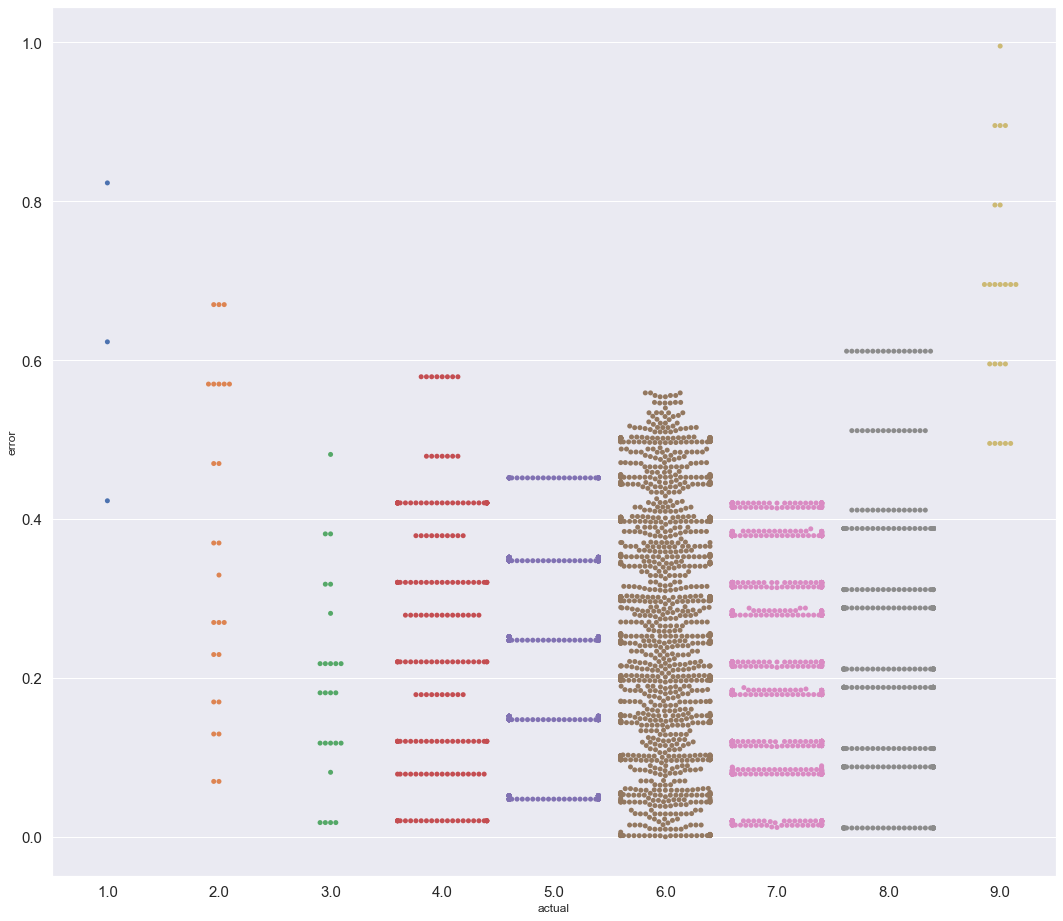

In [124]:
plot_true_vs_pred(y_test,y_predict_summary[1])

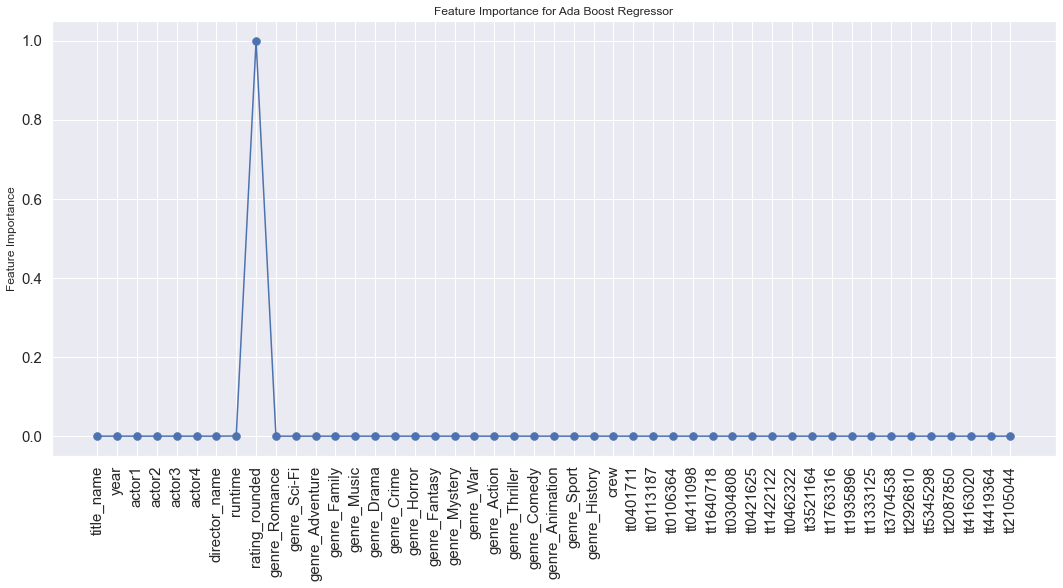

In [125]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(ada_boost.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(ada_boost.best_estimator_.feature_importances_)), X_train.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Ada Boost Regressor')
#axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

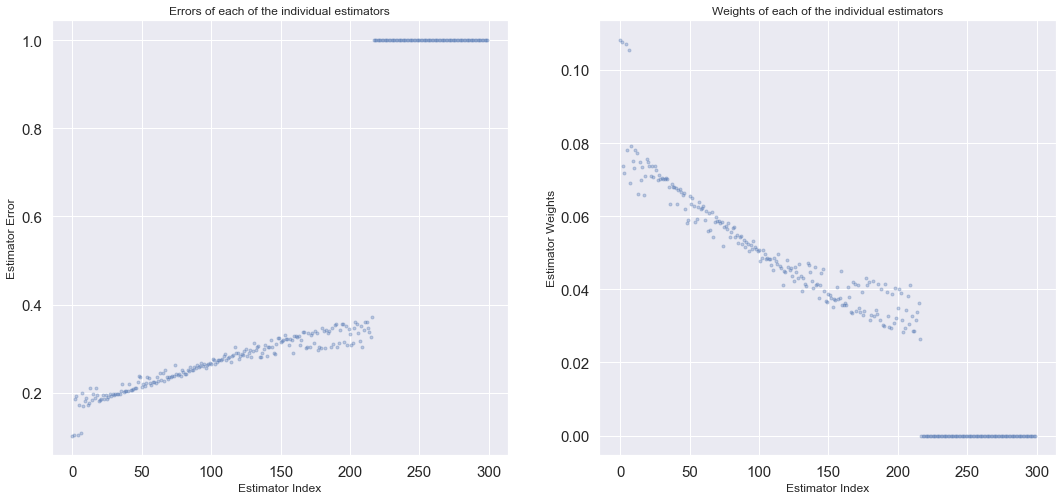

In [126]:
fig = plt.figure(figsize=(18, 8))

# Estimator Error Plot
axes = fig.add_subplot(1, 2, 1)
axes.plot(ada_boost.best_estimator_.estimator_errors_, linestyle='None', marker='.', alpha=0.3)
axes.set(xlabel='Estimator Index', ylabel='Estimator Error', title='Errors of each of the individual estimators')

# Estimator Weight Plot
axes = fig.add_subplot(1, 2, 2)
axes.plot(ada_boost.best_estimator_.estimator_weights_, linestyle='None', marker='.', alpha=0.3)
axes.set(xlabel='Estimator Index', ylabel='Estimator Weights', title='Weights of each of the individual estimators')

plt.show()

Observations

From the above plot, it AdaBoost might not be a good model for this problem. Every subsequent estimator seems to result in an increase in the error (and as a result, we give it a lower weight for our final combined estimator model)

## Stacking using Linear Regression

For stacking, we will use the predictions from various models above to be used as features.

In [131]:
# Split the dataset into training and test datasets

Xtrain_stack, Xtest_stack = ypred_train.drop('actualRating', axis=1), ypred_test.drop('actualRating', axis=1)
ytrain_stack, ytest_stack = ypred_train['actualRating'], ypred_test['actualRating']

In [132]:
# Stacking using Linear Regressor 

reg_stack = LinearRegression()

param_summary = ['','']

%time reg_stack.fit(Xtrain_stack, ytrain_stack)
%time rmse_summary, y_predict_summary = model_fit(reg_stack, Xtrain_stack, ytrain_stack, Xtest_stack, ytest_stack)

algo_score.loc['Stacking LR'] = rmse_summary+param_summary

Wall time: 78.2 ms
Wall time: 6.52 ms


In [133]:
algo_score.loc['Stacking LR', 'Training+Test Time(sec)'] = sum(cv_time)+0.062
algo_score

Train RMSE  Test RMSE  \
Modelling Algo                             
Linear Regression    0.280865   0.280315   
Ridge Regression     0.280865   0.280314   
Lasso Regression     0.281799   0.280919   
Random Forest        0.157057   0.344355   
Gradient Boost       0.151231   0.297279   
Ada Boost            0.286244   0.285903   
Stacking LR          0.108260   0.338125   

                                                     Hyperparameters  \
Modelling Algo                                                         
Linear Regression                                                      
Ridge Regression                                     {'alpha': 2.75}   
Lasso Regression                                     {'alpha': 0.01}   
Random Forest      {'n_estimators': 5000, 'min_samples_split': 10...   
Gradient Boost     {'n_estimators': 500, 'min_samples_split': 2, ...   
Ada Boost               {'n_estimators': 300, 'learning_rate': 0.05}   
Stacking LR                                                            

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414  
Lasso Regression                   59.968  
Random Forest                       662.8  
Gradient Boost                     89.796  
Ada Boost                           53.94  
Stacking LR                       872.194

In [138]:
df_stack_coeff = pd.DataFrame({'Individual_Models': Xtrain_stack.columns, 'LR_Coeff': reg_stack.coef_})

In [139]:
df_stack_coeff

Individual_Models   LR_Coeff
0                LR  52.131690
1             Ridge -53.330548
2             Lasso   0.872412
3                RF   0.552004
4                GB   1.010707
5                AB  -0.174414

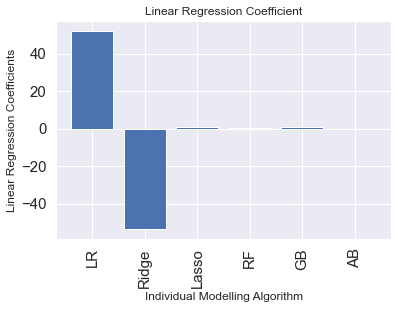

In [140]:
idx = np.array(range(len(reg_stack.coef_)))
labels = Xtrain_stack.columns
plt.bar(height=reg_stack.coef_, x=idx)
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Individual Modelling Algorithm')
plt.ylabel('Linear Regression Coefficients')
plt.title('Linear Regression Coefficient')
plt.show()

## Stacking using Random Forest

In [141]:
# Tuning the hyperparameters

param_distributions = {'n_estimators': [2000,5000], 'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10],'bootstrap': [True,False]}
rf_stack = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time rf_stack.fit(Xtrain_stack, ytrain_stack)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False, total=  40.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.0s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False, total=  37.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False, total=  41.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False, total=  44.3s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, bootstrap=False, total=  43.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estim

[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False, total= 2.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False, total= 2.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False, total= 2.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=1, max_features=log2, max_depth=70, bootstrap=False, total= 2.6min
[CV] n_estimators=50

[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=True, total= 1.6min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=log2, max_depth=80, bootstrap=True, total= 1.6min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=True 
[CV]  n_estimators=5

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=False, total=  45.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=False, total=  45.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, bootstrap=False, total=  46.2s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=3, max_features=log2, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimat

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 1.7min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 1.7min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 1.8min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 1.7min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=sqrt, max_depth=60, bootstrap=False, total= 2.1min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True, total= 1.4min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True, total= 1.5min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=20, bootstrap=True 
[CV]  n_estimators=5

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=True, total= 3.6min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=True, total= 3.6min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False, total= 1.0min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False, total=  57.7s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=2000

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 2.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 2.3min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total= 2.2min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=70, bootstrap=True, total=  35.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=70, bootstrap=True 
[CV]  n_estimators=2000, 

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False, total= 2.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False, total= 2.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False, total= 2.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=log2, max_depth=40, bootstrap=False, total= 2.4min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=7, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=2

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 4.7min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 4.8min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 4.3min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False, total= 4.4min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_esti

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=log2, max_depth=70, bootstrap=True, total= 1.7min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True, total= 1.1min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True, total= 1.1min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True, total= 1.1min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=20

[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True, total= 3.6min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=40, bootstrap=True, total= 3.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=80, bootstrap=False, total=  48.8s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=80, bootstrap=False, total=  49.0s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=80, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=50, bootstrap=True, total=  33.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=50, bootstrap=True, total=  33.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=50, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=50, bootstrap=True, total=  33.7s
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True, total= 1.9min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=5000

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total=  59.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total=  57.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total= 1.0min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=100, bootstrap=False, total=  59.6s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=100, bootstrap=False 
[CV]

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False, total= 2.3min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 883.6min finished


Wall time: 14h 46min 23s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 7, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2000, 5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [143]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_stack.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 5000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


In [144]:
# Following code uses the best parameters generated above to fit the model

param_distributions = {'n_estimators': [5000], 'max_features':['auto'], 'min_samples_leaf':[3], 'max_depth':[90], 'min_samples_split':[5],'bootstrap': [True]}
rf_stack = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time rf_stack.fit(Xtrain_stack, ytrain_stack)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 3.3min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 3.3min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 3.7min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 3.7min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=90, bootstrap=True, total= 3.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 18.0min finished


Wall time: 22min 50s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True], 'max_depth': [90],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5],
                                        'n_estimators': [5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [145]:
param_summary = [rf_stack.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(rf_stack, Xtrain_stack, ytrain_stack, Xtest_stack, ytest_stack)

Wall time: 33.8 s


## Stacking using Gradient Boost

In [146]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators': [50,100,250,500,1000,2000,5000], 'learning_rate':[0.01, 0.02, 0.05, 0.1],'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1, 3, 7, 10], 'max_depth':list(np.arange(10,110,10)), 'min_samples_split':[2,5,10]}
gb_stack = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_distributions, verbose=2, n_iter = 100,cv=5, scoring=rmse_cv)
%time gb_stack.fit(Xtrain_stack, ytrain_stack)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02, total=33.4min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 33.4min remaining:    0.0s


[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02, total=35.0min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02, total=35.6min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02, total=35.3min
[CV] n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02 
[CV]  n_estimators=5000, min_samples_split=2, min_samples_leaf=7, max_features=auto, max_depth=90, learning_rate=0.02, total=34.2

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=10, learning_rate=0.01, total= 2.1min
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.01, total=   2.8s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.01, total=   2.8s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_rate=0.01, total=   2.7s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=40, learning_

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total= 2.3min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total= 2.3min
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=40, learning_rate=0.01, total= 2.3min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=40, learning_rate=0.05, total= 1.4min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=40, learning_ra

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1, total= 1.1min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1, total= 1.1min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1, total= 1.1min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1, total= 1.1min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=7, max_features=log2, max_depth=70, learning_rate=0.1 
[CV]  n_esti

[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, learning_rate=0.01, total=   7.0s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=7, max_features=log2, max_depth=100, learning_rate=0.01, total=   7.6s
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1, total= 9.3min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0.1, total= 9.2min
[CV] n_estimators=5000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=20, learning_rate=0

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02, total=   2.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02, total=   2.8s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02, total=   2.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=30, learning_rate=0.02, total=   2.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=7, max_features=log2, max_depth=90, learning_rate=0.02, total=   2.8s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01, total=   3.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01, total=   3.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01, total=   3.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=20, learning_rate=0.01 
[CV

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.1, total=   4.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.1, total=   4.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.1 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, learning_rate=0.1, total=   4.2s
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=40, learning_rate=0.05, total=16.7min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=7, max_features=auto, max_depth=40, learning_rate=0.05 
[CV]  

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1, total=   3.9s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1, total=   3.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1, total=   4.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1, total=   4.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, learning_rate=0.1 
[CV]  n_esti

[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=50, learning_rate=0.05, total= 6.5min
[CV] n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=5000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=50, learning_rate=0.05, total= 7.2min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1, total= 2.4min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1, total= 2.4min
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=60, learning_rate=0.1 
[

[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1, total= 2.7min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1, total= 2.9min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1, total= 2.7min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, learning_rate=0.1, total= 2.8min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=80, learning_rate=0.02 
[C

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=10, max_features=log2, max_depth=10, learning_rate=0.05, total=   2.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.05, total=  17.4s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.05, total=  17.0s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.05 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.05, total=  16.6s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=50, learning_rate=0.

[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, learning_rate=0.01, total=   1.5s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, learning_rate=0.01, total=   1.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, learning_rate=0.01 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=7, max_features=sqrt, max_depth=40, learning_rate=0.01, total=   1.5s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, learning_rate=0.05 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, learning_rate=0.05, total=   9.7s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100, learning_rate=0.05 
[

[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01, total=  14.4s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01, total=  14.1s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01, total=  14.9s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01 
[CV]  n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.01, total=  13.7s
[CV] n_estimators=250, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=50, learning_rate=0.

[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=100, learning_rate=0.01, total= 4.3min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=100, learning_rate=0.01 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=100, learning_rate=0.01, total= 4.4min
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05, total=  19.6s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0.05, total=  19.1s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, learning_rate=0

[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05, total=   1.4s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05, total=   1.5s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05, total=   1.3s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=10, max_features=log2, max_depth=90, learning_rate=0.05, total=   1.3s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 1404.2min finished


Wall time: 23h 24min 29s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.05,
                                                          0.1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 7, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000, 2000, 5000]},
                   scoring=make_scorer(rmse, greater_is_better=False),
                   verbose=2)

In [147]:
print('Best parameters for Random Forest Regression Model: {}'.format(gb_stack.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.02}


In [148]:
param_summary = [gb_stack.best_params_,'']

%time rmse_summary, y_predict_summary = model_fit(gb_stack, Xtrain_stack, ytrain_stack, Xtest_stack, ytest_stack)

Wall time: 708 ms


In [149]:
algo_score.loc['Stacking GB'] = rmse_summary+param_summary
algo_score.loc['Stacking GB', 'Training+Test Time(sec)'] = sum(cv_time)+1210.30
algo_score

Train RMSE  Test RMSE  \
Modelling Algo                             
Linear Regression    0.280865   0.280315   
Ridge Regression     0.280865   0.280314   
Lasso Regression     0.281799   0.280919   
Random Forest        0.157057   0.344355   
Gradient Boost       0.151231   0.297279   
Ada Boost            0.286244   0.285903   
Stacking LR          0.108260   0.338125   
Stacking GB          0.023959   0.291744   

                                                     Hyperparameters  \
Modelling Algo                                                         
Linear Regression                                                      
Ridge Regression                                     {'alpha': 2.75}   
Lasso Regression                                     {'alpha': 0.01}   
Random Forest      {'n_estimators': 5000, 'min_samples_split': 10...   
Gradient Boost     {'n_estimators': 500, 'min_samples_split': 2, ...   
Ada Boost               {'n_estimators': 300, 'learning_rate': 0.05}   
Stacking LR                                                            
Stacking GB        {'n_estimators': 500, 'min_samples_split': 5, ...   

                  Training+Test Time(sec)  
Modelling Algo                             
Linear Regression                   0.214  
Ridge Regression                    5.414  
Lasso Regression                   59.968  
Random Forest                       662.8  
Gradient Boost                     89.796  
Ada Boost                           53.94  
Stacking LR                       872.194  
Stacking GB                       2082.43

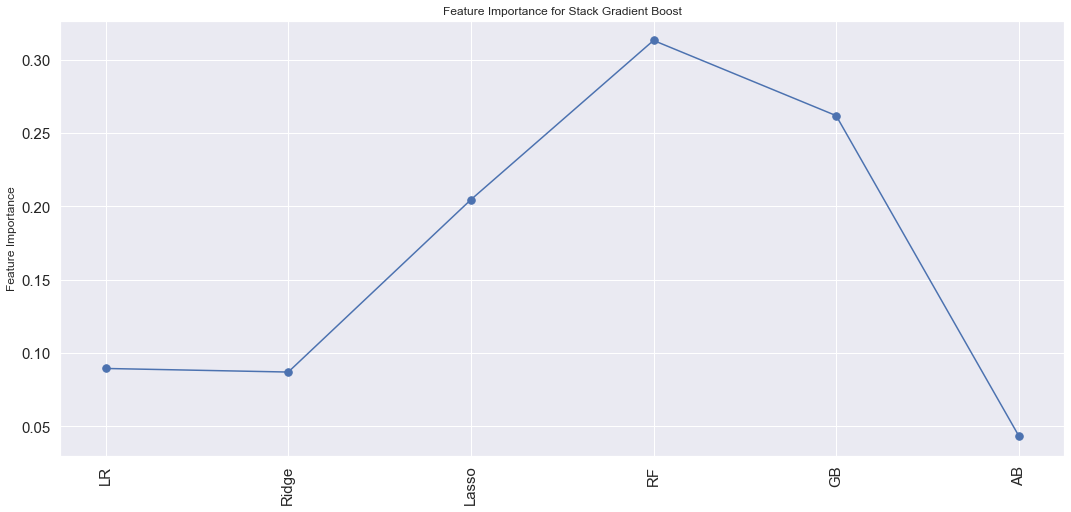

In [150]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(gb_stack.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(gb_stack.best_estimator_.feature_importances_)), Xtrain_stack.columns,rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Stack Gradient Boost')
# axes.set(xlim=[-1, len(X_train.columns)], ylim=[0, 1])

plt.show()

## SUMMARY AND CONCLUSIONS

### RMSE

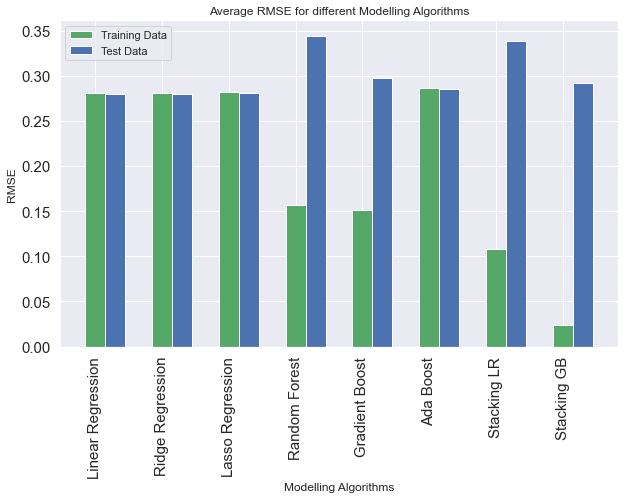

In [151]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Train RMSE', x=idx, color='g', width=bar_width, label='Training Data')
plt.bar(data=algo_score, height='Test RMSE', x=idx+bar_width, color='b', width=bar_width, label='Test Data')
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('RMSE')
plt.title('Average RMSE for different Modelling Algorithms')
plt.legend()
plt.show()

### Train/Test Time

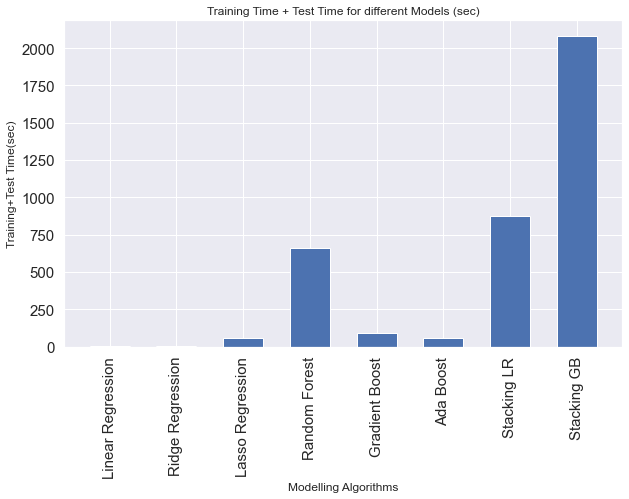

In [152]:
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.6
idx = np.array(range(algo_score.shape[0]))
labels = algo_score.index
plt.bar(data=algo_score, height='Training+Test Time(sec)', x=idx, width=bar_width)
plt.xticks(idx, labels, rotation=90)
plt.xlabel('Modelling Algorithms')
plt.ylabel('Training+Test Time(sec)')
plt.title('Training Time + Test Time for different Models (sec)')
#axes.set_yscale('log')
plt.show()